# Data Exploration of the Aprendemos Student Data Set

***By Doug Dahl***


## Overview

Aprendemos is a web application (https://www.aprendemos.io/info) that I developed during my time as a Teach for America corps member. About 200 students from grades 7-10 used this application, with a frequency ranging from roughly bi-weekly to consistent, daily use. Students used this application to complete entrance and exit tickets during their math classes. As they completed their assignments those students also submitted self-report questionnaires about their emotional states while the platform collected some rudimentary behavioral data. 

In this dataset, I will be working with features representing academic performance indicators, self-reported emotional status, frequency of app usage, and more. The dataset spans a collection period of ~10 months, and is comprised of 2367 entries.


## Purpose

Aprendemos was originally made with the purpose of providing teachers proactive notifications when a student had a behavioral and emotional profile that was likely to precede an acute behavioral or emotional event during the school day. These notifications were intended to improve proactivity and trust in student-teacher relationships, and consequently reduce teacher bias in discipline. 

While Aprendemos did include a feature that allowed teachers to record behavioral or emotional incidents that students were involved in throughout the day, the feature was not often used, which puts a limit on the data relevant to my original goal of understanding the antecedents to increased student behavioral and emotional needs. Additionally, the number of data entries per student was large for some groups of students, while others only used the platform a handful of times beginning halfway through the year. Because of this, the data are likely to be biased towards trends in those early adopter classrooms than trends overall. Furthermore, the early adopter classrooms were all in title 1 school districts in Houston, TX, and so the data can only claim to represent trends relevant to the demographics of those first few pilot classrooms. Despite these limitations, the data that was collected with Aprendemos has still proven to be a great resource in better understanding the the emotional worlds of the platform's student users, as well as the potential impact of these emotions on academic outcomes. As more daily emotional student data is collected, the findings here should provide a valuable foundation for future exploration.

In this notebook specifically, I will conduct data ingestion, visualization, and introductory analysis using typical Python packages such as Matplotlib and Seaborn for data visualization, as well as Scipy, and Pandas for data manipulation and introductory analysis. In an upcoming notebook, I will analyze these data further in an attempt to identify patterns or clusters relating to students' self-reporting habits, academic success, and fundamental behavioral markers.

In the subsequent sections of this report, I will discuss the data ingestion process, followed by detailed data visualization and interpretation. In the final part, I will outline potentially interesting features for the upcoming cluster identification.


## What You'll Learn!

Clear expectations are one of the fundamental parts of a good lesson plan! Through this introductory data analysis, you can expect to explore the following questions (and more!):

   - Does student performance vary throughout the week?
   - Do student emotions influence one another? 
   - Does student performance vary based on their self-reported emotional state?
   - How do different students approach formative assessments?
   - How do different students behave when asked to self-report emotions?
   
   
## In Conclusion

I have put a lot of effort into working on Aprendemos over the past two years. This was a project that I built and piloted while also working full-time as a teacher, and neither my effort nor the project itself would have been possible without the students that inspired me in the first place. My overarching aim, beyond this project, continues to be empowering proactivity, trust, and insight in student support. I'm employing my experience from this project and continuing to work towards this mission with my current venture at Abloom (www.abloomai.com).

In [1]:
### Let's start by importing all the necessary packages:

In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import pandas as pd
!pip install pymongo
from pymongo import MongoClient
from scipy.stats import pearsonr

In [3]:
### And then we can go ahead and fetch the data

In [4]:
client = MongoClient(### private url ###)
db = client.test
collection = db.students

In [5]:
query = {}

### Fetch the data
data = list(collection.find(query))

In [6]:
students_df = pd.DataFrame(data)

In [7]:
students_df.head(10)

,_id,user_id,name,classes,emoProfile,academicPerformance,__v
0,62fed793f5da1bb506ca6321,62fed793f5da1bb506ca631d,Mr Dahl (student),"[62fed7baf5da1bb506ca6328, 630002786b9b990dee4...",calm,"[{'class_id': '62fed7baf5da1bb506ca6328', 'dai...",0
1,62ffcf847e38fad234e4aded,62ffcf837e38fad234e4ade9,Douglas,[62fed7baf5da1bb506ca6328],calm,"[{'class_id': '62fed7baf5da1bb506ca6328', 'dai...",0
2,62ffe9bd17896ba5497b8dea,62ffe9bd17896ba5497b8de6,Adalyn,[62fed7baf5da1bb506ca6328],calm,"[{'class_id': '62fed7baf5da1bb506ca6328', 'dai...",0
3,62ffe9d317896ba5497b8df4,62ffe9d317896ba5497b8df0,Stephany,[62fed7baf5da1bb506ca6328],calm,"[{'class_id': '62fed7baf5da1bb506ca6328', 'dai...",0
4,62ffe9d417896ba5497b8dfb,62ffe9d317896ba5497b8df7,Melanie,[62fed7baf5da1bb506ca6328],calm,"[{'class_id': '62fed7baf5da1bb506ca6328', 'dai...",0
5,62ffe9f117896ba5497b8e25,62ffe9f117896ba5497b8e20,Uri,[62fed7baf5da1bb506ca6328],calm,"[{'class_id': '62fed7baf5da1bb506ca6328', 'dai...",0
6,62ffea3717896ba5497b8e44,62ffea3717896ba5497b8e40,Diego Ramos,[62fed7baf5da1bb506ca6328],calm,"[{'class_id': '62fed7baf5da1bb506ca6328', 'dai...",0
7,62ffea3817896ba5497b8e4d,62ffea3817896ba5497b8e49,Adam,[62fed7baf5da1bb506ca6328],calm,"[{'class_id': '62fed7baf5da1bb506ca6328', 'dai...",0
8,62ffea5417896ba5497b8e7c,62ffea5417896ba5497b8e78,Malyiah,[62fed7baf5da1bb506ca6328],calm,"[{'class_id': '62fed7baf5da1bb506ca6328', 'dai...",0
9,62ffea5e17896ba5497b8e94,62ffea5e17896ba5497b8e90,Isabel Gamez,[],calm,[],0


In [8]:
students_df.academicPerformance.info()

<class 'pandas.core.series.Series'>
RangeIndex: 200 entries, 0 to 199
Series name: academicPerformance
Non-Null Count  Dtype 
--------------  ----- 
200 non-null    object
dtypes: object(1)
memory usage: 1.7+ KB


In [9]:
students_df['classes_length'] = students_df['classes'].apply(len)

### Filter the rows where the length of 'classes' is 0 (inactive account) or greater than 2 (dev testing account)
inactive_accounts = students_df[(students_df['classes_length'] == 0) | (students_df['classes_length']>2)]
inactive_accounts

,_id,user_id,name,classes,emoProfile,academicPerformance,__v,classes_length
0,62fed793f5da1bb506ca6321,62fed793f5da1bb506ca631d,Mr Dahl (student),"[62fed7baf5da1bb506ca6328, 630002786b9b990dee4...",calm,"[{'class_id': '62fed7baf5da1bb506ca6328', 'dai...",0,5
9,62ffea5e17896ba5497b8e94,62ffea5e17896ba5497b8e90,Isabel Gamez,[],calm,[],0,0
27,6320d763b001edd6135f60a7,6320d763b001edd6135f60a3,Osvaldo,[],calm,[],0,0
28,6320d846b001edd6135f60b4,6320d846b001edd6135f60b0,Daniel Garcia,[],calm,[],0,0
49,63b5a81449edc657372c3ea6,63b5a81449edc657372c3ea2,Mr Dahl,[],calm,[],0,0
64,63b5ddf5e4f1233834deeaca,63b5ddf4e4f1233834deeac6,Test,[],calm,[],0,0
99,63be11b6e860aea3fd7aa98d,63be11b6e860aea3fd7aa989,Test,[],calm,[],0,0
101,63be1546e860aea3fd7aaa61,63be1546e860aea3fd7aaa5d,P,[],calm,[],0,0
102,63be2f1fe860aea3fd7aac3c,63be2f1fe860aea3fd7aac38,Test,[],calm,[],0,0
103,63c16c863c14256c2ea85ee5,63c16c843c14256c2ea85ee1,Doug,[],calm,[],0,0


In [10]:
inactive_account_ids = inactive_accounts['user_id'].tolist()

### Filter 'active_students' based on 'student_id' not in 'inactive_account_ids'
active_students = students_df[~students_df['user_id'].isin(inactive_account_ids)]
active_students

,_id,user_id,name,classes,emoProfile,academicPerformance,__v,classes_length
1,62ffcf847e38fad234e4aded,62ffcf837e38fad234e4ade9,Douglas,[62fed7baf5da1bb506ca6328],calm,"[{'class_id': '62fed7baf5da1bb506ca6328', 'dai...",0,1
2,62ffe9bd17896ba5497b8dea,62ffe9bd17896ba5497b8de6,Adalyn,[62fed7baf5da1bb506ca6328],calm,"[{'class_id': '62fed7baf5da1bb506ca6328', 'dai...",0,1
3,62ffe9d317896ba5497b8df4,62ffe9d317896ba5497b8df0,Stephany,[62fed7baf5da1bb506ca6328],calm,"[{'class_id': '62fed7baf5da1bb506ca6328', 'dai...",0,1
4,62ffe9d417896ba5497b8dfb,62ffe9d317896ba5497b8df7,Melanie,[62fed7baf5da1bb506ca6328],calm,"[{'class_id': '62fed7baf5da1bb506ca6328', 'dai...",0,1
5,62ffe9f117896ba5497b8e25,62ffe9f117896ba5497b8e20,Uri,[62fed7baf5da1bb506ca6328],calm,"[{'class_id': '62fed7baf5da1bb506ca6328', 'dai...",0,1
...,...,...,...,...,...,...,...,...
194,63f8e61852850f094e19737f,63f8e61852850f094e19737b,Sanai Watson,[63d328ff7f352341e596f713],calm,"[{'class_id': '63d328ff7f352341e596f713', 'dai...",0,1
195,63f8e68c52850f094e197396,63f8e68b52850f094e197392,Carlos,[63d328ff7f352341e596f713],calm,"[{'class_id': '63d328ff7f352341e596f713', 'dai...",0,1
196,63f8e69f52850f094e1973a9,63f8e69f52850f094e1973a5,Rheanna Holmes,[63d328ff7f352341e596f713],calm,"[{'class_id': '63d328ff7f352341e596f713', 'dai...",0,1
197,63f8e6bd52850f094e1973bb,63f8e6bd52850f094e1973b7,victor,[63d328ff7f352341e596f713],calm,"[{'class_id': '63d328ff7f352341e596f713', 'dai...",0,1


In [11]:
### This account was also a dev testing account
extra_dev_account = (active_students['name'] == "Douglas") 

rows_to_drop = active_students[extra_dev_account]

### Drop the selected rows from the DataFrame
active_students = active_students.drop(rows_to_drop.index)

In [12]:
### Make a df copy to avoid modifying the original further
copied_active_students = active_students.copy()
copied_active_students

,_id,user_id,name,classes,emoProfile,academicPerformance,__v,classes_length
2,62ffe9bd17896ba5497b8dea,62ffe9bd17896ba5497b8de6,Adalyn,[62fed7baf5da1bb506ca6328],calm,"[{'class_id': '62fed7baf5da1bb506ca6328', 'dai...",0,1
3,62ffe9d317896ba5497b8df4,62ffe9d317896ba5497b8df0,Stephany,[62fed7baf5da1bb506ca6328],calm,"[{'class_id': '62fed7baf5da1bb506ca6328', 'dai...",0,1
4,62ffe9d417896ba5497b8dfb,62ffe9d317896ba5497b8df7,Melanie,[62fed7baf5da1bb506ca6328],calm,"[{'class_id': '62fed7baf5da1bb506ca6328', 'dai...",0,1
5,62ffe9f117896ba5497b8e25,62ffe9f117896ba5497b8e20,Uri,[62fed7baf5da1bb506ca6328],calm,"[{'class_id': '62fed7baf5da1bb506ca6328', 'dai...",0,1
6,62ffea3717896ba5497b8e44,62ffea3717896ba5497b8e40,Diego Ramos,[62fed7baf5da1bb506ca6328],calm,"[{'class_id': '62fed7baf5da1bb506ca6328', 'dai...",0,1
...,...,...,...,...,...,...,...,...
194,63f8e61852850f094e19737f,63f8e61852850f094e19737b,Sanai Watson,[63d328ff7f352341e596f713],calm,"[{'class_id': '63d328ff7f352341e596f713', 'dai...",0,1
195,63f8e68c52850f094e197396,63f8e68b52850f094e197392,Carlos,[63d328ff7f352341e596f713],calm,"[{'class_id': '63d328ff7f352341e596f713', 'dai...",0,1
196,63f8e69f52850f094e1973a9,63f8e69f52850f094e1973a5,Rheanna Holmes,[63d328ff7f352341e596f713],calm,"[{'class_id': '63d328ff7f352341e596f713', 'dai...",0,1
197,63f8e6bd52850f094e1973bb,63f8e6bd52850f094e1973b7,victor,[63d328ff7f352341e596f713],calm,"[{'class_id': '63d328ff7f352341e596f713', 'dai...",0,1


In [13]:
### Dropping unused columns. "emoProfile" was set upon account creation and then never modified
copied_active_students = copied_active_students.drop(columns = ["classes_length", "emoProfile", "classes", "_id", "__v"])
copied_active_students

,user_id,name,academicPerformance
2,62ffe9bd17896ba5497b8de6,Adalyn,"[{'class_id': '62fed7baf5da1bb506ca6328', 'dai..."
3,62ffe9d317896ba5497b8df0,Stephany,"[{'class_id': '62fed7baf5da1bb506ca6328', 'dai..."
4,62ffe9d317896ba5497b8df7,Melanie,"[{'class_id': '62fed7baf5da1bb506ca6328', 'dai..."
5,62ffe9f117896ba5497b8e20,Uri,"[{'class_id': '62fed7baf5da1bb506ca6328', 'dai..."
6,62ffea3717896ba5497b8e40,Diego Ramos,"[{'class_id': '62fed7baf5da1bb506ca6328', 'dai..."
...,...,...,...
194,63f8e61852850f094e19737b,Sanai Watson,"[{'class_id': '63d328ff7f352341e596f713', 'dai..."
195,63f8e68b52850f094e197392,Carlos,"[{'class_id': '63d328ff7f352341e596f713', 'dai..."
196,63f8e69f52850f094e1973a5,Rheanna Holmes,"[{'class_id': '63d328ff7f352341e596f713', 'dai..."
197,63f8e6bd52850f094e1973b7,victor,"[{'class_id': '63d328ff7f352341e596f713', 'dai..."


In [14]:
### Here we're going to start to turn some nested arrays filled with objects into a workable dataframe
academic_performance_base = copied_active_students.explode('academicPerformance')
academic_performance_base

,user_id,name,academicPerformance
2,62ffe9bd17896ba5497b8de6,Adalyn,"{'class_id': '62fed7baf5da1bb506ca6328', 'dail..."
3,62ffe9d317896ba5497b8df0,Stephany,"{'class_id': '62fed7baf5da1bb506ca6328', 'dail..."
4,62ffe9d317896ba5497b8df7,Melanie,"{'class_id': '62fed7baf5da1bb506ca6328', 'dail..."
4,62ffe9d317896ba5497b8df7,Melanie,"{'class_id': '62fed7baf5da1bb506ca6328', 'dail..."
5,62ffe9f117896ba5497b8e20,Uri,"{'class_id': '62fed7baf5da1bb506ca6328', 'dail..."
...,...,...,...
194,63f8e61852850f094e19737b,Sanai Watson,"{'class_id': '63d328ff7f352341e596f713', 'dail..."
195,63f8e68b52850f094e197392,Carlos,"{'class_id': '63d328ff7f352341e596f713', 'dail..."
196,63f8e69f52850f094e1973a5,Rheanna Holmes,"{'class_id': '63d328ff7f352341e596f713', 'dail..."
197,63f8e6bd52850f094e1973b7,victor,"{'class_id': '63d328ff7f352341e596f713', 'dail..."


In [15]:
### Here we're going to apply a function to the academic performance column to get the data out of the sub-arrays
### of academicPerformance and into separate dfs of their own
academic_performance_base['daily_performance'] = academic_performance_base['academicPerformance'].apply(lambda x: x.get('daily_performance', None))
academic_performance_base['emotional_data'] = academic_performance_base['academicPerformance'].apply(lambda x: x.get('emotional_data', None))
academic_performance_base['emoji_clicks'] = academic_performance_base['academicPerformance'].apply(lambda x: x.get('emoji_clicks', None))
academic_performance_base['wait_times'] = academic_performance_base['academicPerformance'].apply(lambda x: x.get('wait_times', None))

In [16]:
### Then, after we get the sub-arrays out, we're going to explode them again to get at the objects inside the sub-arrays
daily_performance_df = academic_performance_base.explode('daily_performance')
emo_data_df = academic_performance_base.explode('emotional_data')
emoji_df = academic_performance_base.explode('emoji_clicks')
wait_time_df = academic_performance_base.explode('wait_times')

daily_performance_df

,user_id,name,academicPerformance,daily_performance,emotional_data,emoji_clicks,wait_times
2,62ffe9bd17896ba5497b8de6,Adalyn,"{'class_id': '62fed7baf5da1bb506ca6328', 'dail...","{'date': '8/22/2022', 'questions_correct': 5, ...","[{'date': '8/19/2022', 'sentiment_score': 10, ...","[{'date': '8/19/2022', 'clicks': 0}, {'date': ...","[{'date': '8/19/2022', 'time': 7285, 'portion'..."
2,62ffe9bd17896ba5497b8de6,Adalyn,"{'class_id': '62fed7baf5da1bb506ca6328', 'dail...","{'date': '8/23/2022', 'questions_correct': 6, ...","[{'date': '8/19/2022', 'sentiment_score': 10, ...","[{'date': '8/19/2022', 'clicks': 0}, {'date': ...","[{'date': '8/19/2022', 'time': 7285, 'portion'..."
2,62ffe9bd17896ba5497b8de6,Adalyn,"{'class_id': '62fed7baf5da1bb506ca6328', 'dail...","{'date': '8/24/2022', 'questions_correct': 5, ...","[{'date': '8/19/2022', 'sentiment_score': 10, ...","[{'date': '8/19/2022', 'clicks': 0}, {'date': ...","[{'date': '8/19/2022', 'time': 7285, 'portion'..."
2,62ffe9bd17896ba5497b8de6,Adalyn,"{'class_id': '62fed7baf5da1bb506ca6328', 'dail...","{'date': '8/25/2022', 'questions_correct': 13,...","[{'date': '8/19/2022', 'sentiment_score': 10, ...","[{'date': '8/19/2022', 'clicks': 0}, {'date': ...","[{'date': '8/19/2022', 'time': 7285, 'portion'..."
2,62ffe9bd17896ba5497b8de6,Adalyn,"{'class_id': '62fed7baf5da1bb506ca6328', 'dail...","{'date': '8/26/2022', 'questions_correct': 16,...","[{'date': '8/19/2022', 'sentiment_score': 10, ...","[{'date': '8/19/2022', 'clicks': 0}, {'date': ...","[{'date': '8/19/2022', 'time': 7285, 'portion'..."
...,...,...,...,...,...,...,...
194,63f8e61852850f094e19737b,Sanai Watson,"{'class_id': '63d328ff7f352341e596f713', 'dail...",NaN,"[{'date': '2/24/2023', 'sentiment_score': 8, '...","[{'date': '2/24/2023', 'clicks': 0}]",[]
195,63f8e68b52850f094e197392,Carlos,"{'class_id': '63d328ff7f352341e596f713', 'dail...",NaN,"[{'date': '2/24/2023', 'sentiment_score': 10, ...","[{'date': '2/24/2023', 'clicks': 0}]","[{'date': '2/24/2023', 'time': 1428, 'portion'..."
196,63f8e69f52850f094e1973a5,Rheanna Holmes,"{'class_id': '63d328ff7f352341e596f713', 'dail...",NaN,"[{'date': '2/24/2023', 'sentiment_score': 5, '...","[{'date': '2/24/2023', 'clicks': 0}]","[{'date': '2/24/2023', 'time': 1260, 'portion'..."
197,63f8e6bd52850f094e1973b7,victor,"{'class_id': '63d328ff7f352341e596f713', 'dail...",NaN,"[{'date': '2/24/2023', 'sentiment_score': 5, '...","[{'date': '2/24/2023', 'clicks': 0}]","[{'date': '2/24/2023', 'time': 2502, 'portion'..."


In [17]:
### Transform the following columns from a dictionary format into their own separate columns
df_daily_performance = daily_performance_df[['user_id', 'daily_performance']].copy()
df_daily_performance = pd.concat([df_daily_performance.drop(['daily_performance'], axis=1), df_daily_performance['daily_performance'].apply(pd.Series)], axis=1)

df_emotional_data = emo_data_df[['user_id', 'emotional_data']].copy()
df_emotional_data = pd.concat([df_emotional_data.drop(['emotional_data'], axis=1), df_emotional_data['emotional_data'].apply(pd.Series)], axis=1)

df_emoji_clicks = emoji_df[['user_id', 'emoji_clicks']].copy()
df_emoji_clicks = pd.concat([df_emoji_clicks.drop(['emoji_clicks'], axis=1), df_emoji_clicks['emoji_clicks'].apply(pd.Series)], axis=1)

df_wait_times = wait_time_df[['user_id', 'wait_times']].copy()
df_wait_times = pd.concat([df_wait_times.drop(['wait_times'], axis=1), df_wait_times['wait_times'].apply(pd.Series)], axis=1)

df_emotional_data


,user_id,date,sentiment_score,confidence_score,motivation_score,comments,0
2,62ffe9bd17896ba5497b8de6,8/19/2022,10.0,9.0,10.0,I am feeling good,NaN
2,62ffe9bd17896ba5497b8de6,8/22/2022,10.0,9.0,10.0,I am feeling good,NaN
2,62ffe9bd17896ba5497b8de6,8/23/2022,9.0,10.0,10.0,I am feeling good,NaN
2,62ffe9bd17896ba5497b8de6,8/24/2022,9.0,10.0,10.0,I am feeling good,NaN
2,62ffe9bd17896ba5497b8de6,8/25/2022,10.0,10.0,10.0,I am feeling good,NaN
...,...,...,...,...,...,...,...
194,63f8e61852850f094e19737b,2/24/2023,8.0,6.0,5.0,I'm feeling okay so far,NaN
195,63f8e68b52850f094e197392,2/24/2023,10.0,9.0,10.0,Good i guess,NaN
196,63f8e69f52850f094e1973a5,2/24/2023,5.0,1.0,1.0,my day has been okay so far.,NaN
197,63f8e6bd52850f094e1973b7,2/24/2023,5.0,7.0,7.0,I feel Neutral,NaN


In [18]:
### Now we'll merge the series we just created based on 'date' and 'user_id', since ultimately I want 1 row per user
### per day of activity
df1 = pd.merge(df_daily_performance, df_emotional_data,  on=['date', 'user_id'])
df1

,user_id,date,questions_correct,questions_answered,0_x,sentiment_score,confidence_score,motivation_score,comments,0_y
0,62ffe9bd17896ba5497b8de6,8/22/2022,5.0,5.0,NaN,10.0,9.0,10.0,I am feeling good,NaN
1,62ffe9bd17896ba5497b8de6,8/23/2022,6.0,6.0,NaN,9.0,10.0,10.0,I am feeling good,NaN
2,62ffe9bd17896ba5497b8de6,8/24/2022,5.0,5.0,NaN,9.0,10.0,10.0,I am feeling good,NaN
3,62ffe9bd17896ba5497b8de6,8/25/2022,13.0,13.0,NaN,10.0,10.0,10.0,I am feeling good,NaN
4,62ffe9bd17896ba5497b8de6,8/26/2022,16.0,16.0,NaN,10.0,10.0,10.0,I am feeling good,NaN
...,...,...,...,...,...,...,...,...,...,...
2962,63d93db6fb606d6189cdc1e8,2/8/2023,1.0,3.0,NaN,3.0,7.0,0.0,"i feel sick with a big headache , i think that...",NaN
2963,63d93db6fb606d6189cdc1e8,2/9/2023,1.0,3.0,NaN,6.0,4.0,5.0,"its been good so far, i have seen my bf & bsf ...",NaN
2964,63d93db6fb606d6189cdc1e8,3/2/2023,0.0,3.0,NaN,4.0,1.0,2.0,im feeling a 4,NaN
2965,63d93db6fb606d6189cdc1e8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
df2 = pd.merge(df1, df_emoji_clicks, on=['date', 'user_id'])
df2

,user_id,date,questions_correct,questions_answered,0_x,sentiment_score,confidence_score,motivation_score,comments,0_y,clicks,0
0,62ffe9bd17896ba5497b8de6,8/22/2022,5.0,5.0,NaN,10.0,9.0,10.0,I am feeling good,NaN,0.0,NaN
1,62ffe9bd17896ba5497b8de6,8/23/2022,6.0,6.0,NaN,9.0,10.0,10.0,I am feeling good,NaN,0.0,NaN
2,62ffe9bd17896ba5497b8de6,8/24/2022,5.0,5.0,NaN,9.0,10.0,10.0,I am feeling good,NaN,0.0,NaN
3,62ffe9bd17896ba5497b8de6,8/25/2022,13.0,13.0,NaN,10.0,10.0,10.0,I am feeling good,NaN,0.0,NaN
4,62ffe9bd17896ba5497b8de6,8/25/2022,13.0,13.0,NaN,10.0,10.0,10.0,I am feeling good,NaN,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
3937,63d93db6fb606d6189cdc1e8,2/9/2023,1.0,3.0,NaN,6.0,4.0,5.0,"its been good so far, i have seen my bf & bsf ...",NaN,0.0,NaN
3938,63d93db6fb606d6189cdc1e8,3/2/2023,0.0,3.0,NaN,4.0,1.0,2.0,im feeling a 4,NaN,0.0,NaN
3939,63d93db6fb606d6189cdc1e8,3/2/2023,0.0,3.0,NaN,4.0,1.0,2.0,im feeling a 4,NaN,0.0,NaN
3940,63d93db6fb606d6189cdc1e8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
merged_df = pd.merge(df2, df_wait_times, on=['date', 'user_id'])
merged_df

/var/folders/rw/h_hj3nk97m72q3xd2rt2q6r80000gn/T/ipykernel_21493/2424312397.py:1: FutureWarning: Passing 'suffixes' which cause duplicate columns {'0_x'} in the result is deprecated and will raise a MergeError in a future version.
  merged_df = pd.merge(df2, df_wait_times, on=['date', 'user_id'])


,user_id,date,questions_correct,questions_answered,0_x,sentiment_score,confidence_score,motivation_score,comments,0_y,clicks,0_x,time,portion,0_y
0,62ffe9bd17896ba5497b8de6,8/22/2022,5.0,5.0,NaN,10.0,9.0,10.0,I am feeling good,NaN,0.0,NaN,1149.0,landing,NaN
1,62ffe9bd17896ba5497b8de6,8/22/2022,5.0,5.0,NaN,10.0,9.0,10.0,I am feeling good,NaN,0.0,NaN,995854.0,quiz,NaN
2,62ffe9bd17896ba5497b8de6,8/23/2022,6.0,6.0,NaN,9.0,10.0,10.0,I am feeling good,NaN,0.0,NaN,1703.0,landing,NaN
3,62ffe9bd17896ba5497b8de6,8/23/2022,6.0,6.0,NaN,9.0,10.0,10.0,I am feeling good,NaN,0.0,NaN,684744.0,quiz,NaN
4,62ffe9bd17896ba5497b8de6,8/23/2022,6.0,6.0,NaN,9.0,10.0,10.0,I am feeling good,NaN,0.0,NaN,1756.0,landing,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25526,63d93db6fb606d6189cdc1e8,3/2/2023,0.0,3.0,NaN,4.0,1.0,2.0,im feeling a 4,NaN,0.0,NaN,1392.0,landing,NaN
25527,63d93db6fb606d6189cdc1e8,3/2/2023,0.0,3.0,NaN,4.0,1.0,2.0,im feeling a 4,NaN,0.0,NaN,49385.0,quiz,NaN
25528,63d93db6fb606d6189cdc1e8,3/2/2023,0.0,3.0,NaN,4.0,1.0,2.0,im feeling a 4,NaN,0.0,NaN,30000.0,quiz,NaN
25529,63d93db6fb606d6189cdc1e8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
# Then, merge the resulting dataframe to the original one based on 'user_id'
final_df = pd.merge(copied_active_students, merged_df, on='user_id')
final_df

,user_id,name,academicPerformance,date,questions_correct,questions_answered,0_x,sentiment_score,confidence_score,motivation_score,comments,0_y,clicks,0_x,time,portion,0_y
0,62ffe9bd17896ba5497b8de6,Adalyn,"[{'class_id': '62fed7baf5da1bb506ca6328', 'dai...",8/22/2022,5.0,5.0,NaN,10.0,9.0,10.0,I am feeling good,NaN,0.0,NaN,1149.0,landing,NaN
1,62ffe9bd17896ba5497b8de6,Adalyn,"[{'class_id': '62fed7baf5da1bb506ca6328', 'dai...",8/22/2022,5.0,5.0,NaN,10.0,9.0,10.0,I am feeling good,NaN,0.0,NaN,995854.0,quiz,NaN
2,62ffe9bd17896ba5497b8de6,Adalyn,"[{'class_id': '62fed7baf5da1bb506ca6328', 'dai...",8/23/2022,6.0,6.0,NaN,9.0,10.0,10.0,I am feeling good,NaN,0.0,NaN,1703.0,landing,NaN
3,62ffe9bd17896ba5497b8de6,Adalyn,"[{'class_id': '62fed7baf5da1bb506ca6328', 'dai...",8/23/2022,6.0,6.0,NaN,9.0,10.0,10.0,I am feeling good,NaN,0.0,NaN,684744.0,quiz,NaN
4,62ffe9bd17896ba5497b8de6,Adalyn,"[{'class_id': '62fed7baf5da1bb506ca6328', 'dai...",8/23/2022,6.0,6.0,NaN,9.0,10.0,10.0,I am feeling good,NaN,0.0,NaN,1756.0,landing,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25526,63d93db6fb606d6189cdc1e8,melissa,"[{'class_id': '63d328ff7f352341e596f713', 'dai...",3/2/2023,0.0,3.0,NaN,4.0,1.0,2.0,im feeling a 4,NaN,0.0,NaN,1392.0,landing,NaN
25527,63d93db6fb606d6189cdc1e8,melissa,"[{'class_id': '63d328ff7f352341e596f713', 'dai...",3/2/2023,0.0,3.0,NaN,4.0,1.0,2.0,im feeling a 4,NaN,0.0,NaN,49385.0,quiz,NaN
25528,63d93db6fb606d6189cdc1e8,melissa,"[{'class_id': '63d328ff7f352341e596f713', 'dai...",3/2/2023,0.0,3.0,NaN,4.0,1.0,2.0,im feeling a 4,NaN,0.0,NaN,30000.0,quiz,NaN
25529,63d93db6fb606d6189cdc1e8,melissa,"[{'class_id': '63d328ff7f352341e596f713', 'dai...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
### Drop extra columns created during concatenation
final_df = final_df.drop(columns = ["academicPerformance", "0_x", "0_y", "0_x", "0_y"])
final_df

,user_id,name,date,questions_correct,questions_answered,sentiment_score,confidence_score,motivation_score,comments,clicks,time,portion
0,62ffe9bd17896ba5497b8de6,Adalyn,8/22/2022,5.0,5.0,10.0,9.0,10.0,I am feeling good,0.0,1149.0,landing
1,62ffe9bd17896ba5497b8de6,Adalyn,8/22/2022,5.0,5.0,10.0,9.0,10.0,I am feeling good,0.0,995854.0,quiz
2,62ffe9bd17896ba5497b8de6,Adalyn,8/23/2022,6.0,6.0,9.0,10.0,10.0,I am feeling good,0.0,1703.0,landing
3,62ffe9bd17896ba5497b8de6,Adalyn,8/23/2022,6.0,6.0,9.0,10.0,10.0,I am feeling good,0.0,684744.0,quiz
4,62ffe9bd17896ba5497b8de6,Adalyn,8/23/2022,6.0,6.0,9.0,10.0,10.0,I am feeling good,0.0,1756.0,landing
...,...,...,...,...,...,...,...,...,...,...,...,...
25526,63d93db6fb606d6189cdc1e8,melissa,3/2/2023,0.0,3.0,4.0,1.0,2.0,im feeling a 4,0.0,1392.0,landing
25527,63d93db6fb606d6189cdc1e8,melissa,3/2/2023,0.0,3.0,4.0,1.0,2.0,im feeling a 4,0.0,49385.0,quiz
25528,63d93db6fb606d6189cdc1e8,melissa,3/2/2023,0.0,3.0,4.0,1.0,2.0,im feeling a 4,0.0,30000.0,quiz
25529,63d93db6fb606d6189cdc1e8,melissa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
### Since there's more than one value in the "portion" column for every given day, we currently have multiple
### rows for every day to handle the "quiz" and "landing" time recordings for each day's activity. We need
### to just transform the "quiz" and "landing" time recordings for each day's activity into their own column.
grouped_df = final_df.groupby(['user_id', 'name', 'date', 'portion']).agg({'time': 'mean'}).reset_index()

In [24]:
pivoted_df = grouped_df.pivot(index=['user_id', 'name', 'date'], columns='portion', values='time')

In [25]:
### Now we have a df that has a column for the avg time spent on a quiz and on the landing page
pivoted_df = pivoted_df.rename(columns={'quiz': 'avg_quiz_time', 'landing': 'avg_landing_time'})

In [26]:
### Remove extra columns and duplicate values, then set a multi-index for the new table
final_df = final_df.drop(columns=['portion', 'time']).drop_duplicates()
final_df = final_df.set_index(['user_id', 'name', 'date']).join(pivoted_df).reset_index()

In [27]:
### Group up the data by user and date. All of the fields that have "mean" as their aggregation function
### should have the same value for every date, so this is basically just paring down to one row per date
### while maintaining the one entry for emotional state. 

agg_funcs = {
    'clicks': 'sum',
    'comments': 'first',
    'questions_correct': 'mean',
    'questions_answered': 'mean',
    'sentiment_score': 'mean',
    'confidence_score': 'mean',
    'motivation_score': 'mean',
    'avg_landing_time': 'mean',
    'avg_quiz_time': 'mean',
    'name': 'first'
}

final_df = final_df.groupby(['user_id', 'date']).agg(agg_funcs).reset_index()

In [28]:
### Finally, lets add a few columns that'll be helpful
final_df["pct_score"] = final_df.questions_correct / final_df.questions_answered
final_df["date"] = pd.to_datetime(final_df.date)
final_df["weekday"] = final_df["date"].dt.dayofweek

## We're done with data ingestion and cleaning! Let's get started exploring some questions.

### Question 1: Does student performance change based on day of the week?

Text(0, 0.5, 'Day of the Week')

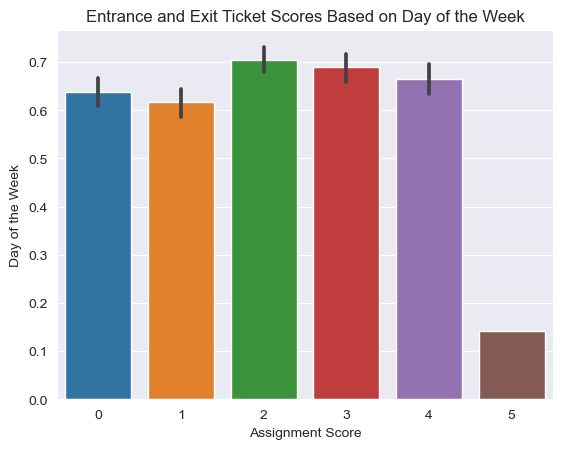

In [29]:
### fig 1.1
sns.set_style('darkgrid')
sns.barplot(x="weekday", y="pct_score", data=final_df);
plt.title("Entrance and Exit Ticket Scores Based on Day of the Week")
plt.xlabel("Assignment Score")
plt.ylabel("Day of the Week")

### Based on Aprendemos' entrance and exit ticket data, it looks like the best performing day of the week is Wednesday, and the worst is Tuesday. 

### Question 2: How do student emotions influence one another?

In [30]:
groupedby_student = final_df.groupby("user_id")

In [31]:
student_variance = groupedby_student[["sentiment_score","confidence_score","motivation_score"]].var()
student_variance.columns = ["sentiment_variance", "confidence_variance", "motivation_variance"]

In [32]:
student_record_count = groupedby_student[["sentiment_score","confidence_score","motivation_score"]].count()
student_record_count

,sentiment_score,confidence_score,motivation_score
user_id,,,
62ffe9bd17896ba5497b8de6,71,71,71
62ffe9d317896ba5497b8df0,66,66,66
62ffe9d317896ba5497b8df7,42,42,42
62ffe9f117896ba5497b8e20,64,64,64
62ffea3717896ba5497b8e40,76,76,76
...,...,...,...
63d7ed58ac8332d2dd9cd24f,7,7,7
63d7eddcac8332d2dd9cd362,4,4,4
63d7f0aaac8332d2dd9cd65b,4,4,4


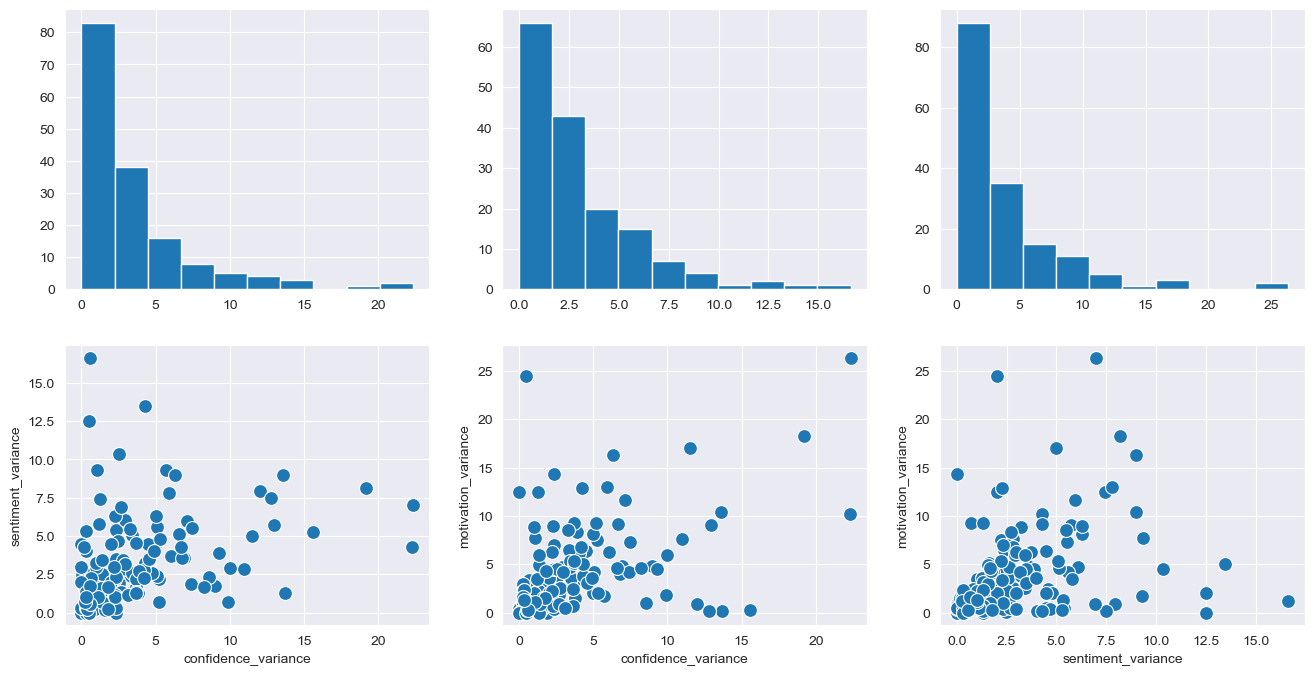

In [33]:
### Let's check out how the variances of the different emotions are distributed (fig. 2.1)
fig, axes = plt.subplots(2, 3, figsize = (16, 8))
sns.set_style("darkgrid")
axes[0, 0].hist(student_variance["confidence_variance"])
axes[0,1].hist(student_variance["sentiment_variance"])
axes[0,2].hist(student_variance["motivation_variance"])
sns.scatterplot(x=student_variance["confidence_variance"], y=student_variance["sentiment_variance"], s=100, ax=axes[1,0])
sns.scatterplot(x=student_variance["confidence_variance"], y=student_variance["motivation_variance"], s=100, ax=axes[1,1])
sns.scatterplot(x=student_variance["sentiment_variance"], y=student_variance["motivation_variance"], s=100, ax=axes[1,2]);

In [34]:
### Looks like confidence and motivation vary together in a noticeable way -- I hypothesize that this might mean
### that there's certain students who are just more likely to pay attention to their questionnaires. 
### Let's look at the data for the scores themselves.

Text(0.5, 1.0, 'Mood vs Motivation')

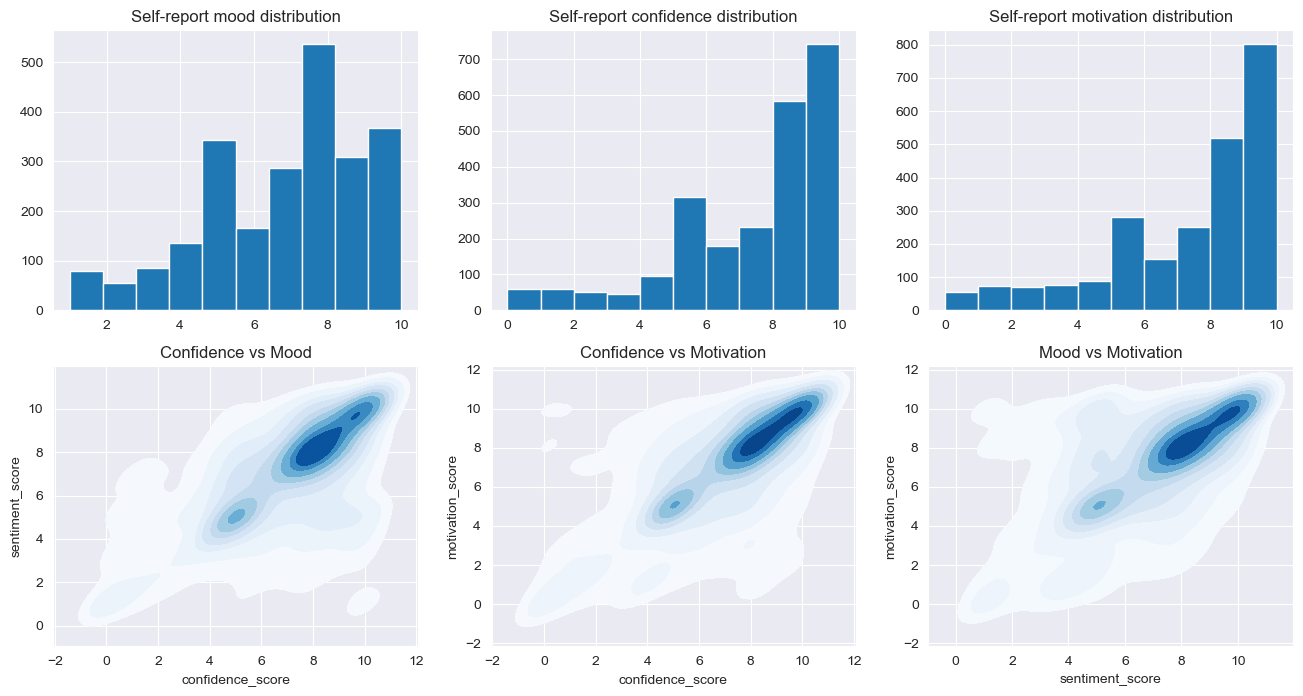

In [35]:
### Let's check out the distribution of the self_report emotional scores & how they relate to one another (fig 2.2)
fig, axes = plt.subplots(2, 3, figsize = (16, 8))
sns.set_style("darkgrid")
axes[0,0].hist(final_df.sentiment_score)
axes[0,0].set_title("Self-report mood distribution")
axes[0,1].hist(final_df.confidence_score)
axes[0,1].set_title("Self-report confidence distribution")
axes[0,2].hist(final_df.motivation_score)
axes[0,2].set_title("Self-report motivation distribution")

cmap = "Blues"
sns.kdeplot(x=final_df["confidence_score"], y=final_df["sentiment_score"], cmap = cmap, fill=True, ax=axes[1,0])
axes[1,0].set_title("Confidence vs Mood")
sns.kdeplot(x=final_df["confidence_score"], y=final_df["motivation_score"], cmap = cmap, fill=True, ax=axes[1,1])
axes[1,1].set_title("Confidence vs Motivation")
sns.kdeplot(x=final_df["sentiment_score"], y=final_df["motivation_score"], cmap = cmap, fill=True, ax=axes[1,2]);
axes[1,2].set_title("Mood vs Motivation")

In [36]:
### Let's look at whether or not the emotions have a relationship to one another

motivation_confidence_score_corr, motivation_confidence_score_p_value = pearsonr(final_df['motivation_score'], final_df['confidence_score'])

motivation_sentiment_score_corr, motivation_sentiment_score_p_value = pearsonr(final_df['motivation_score'], final_df['sentiment_score'])

confidence_sentiment_score_corr, confidence_sentiment_score_p_value = pearsonr(final_df['confidence_score'], final_df['sentiment_score'])

print("Motivation and confidence are correlated with a coefficient of: ", motivation_confidence_score_corr, "and a p-val of: ", motivation_confidence_score_p_value)

print("Motivation and mood are correlated with a coefficient of: ", motivation_sentiment_score_corr, "and a p-val of: ", motivation_sentiment_score_p_value)

print("Confidence and mood are correlated with a coefficient of: ", confidence_sentiment_score_corr, "and a p-val of: ", confidence_sentiment_score_p_value)

Motivation and confidence are correlated with a coefficient of:  0.6417816743960029 and a p-val of:  6.274333470601284e-275
Motivation and mood are correlated with a coefficient of:  0.5599692650809974 and a p-val of:  1.7570924294208696e-195
Confidence and mood are correlated with a coefficient of:  0.5887273230014912 and a p-val of:  7.837001745247377e-221


#### Motivation and confidence the most statistically significant relationship of all the emotions with an r of 0.642 and a p-val < 0.05! 

#### The collection mechanism itself could be driving this correlation, however (EG. Students might just be putting the same number for everything.) I'm interested to see how this relationship changes now that Abloom's data collection will randomize things a bit more. 

#### Let's also explore if the relationship between  self-report motivation and the speed at which a student finishes their quiz is meaningful, to see if we can add some behavioral validation to the "motivation_score" metric.

In [37]:
### Clear the na values for days where students didn't attempt a quiz
clear_nas = final_df.dropna(subset=['motivation_score', 'avg_quiz_time'])

motivation_timespent_quiz_corr, motivation_timespent_quiz_p_value = pearsonr(clear_nas['motivation_score'], clear_nas["avg_quiz_time"])

print("Motivation and time spent on assignments are correlated with a coefficient of: ", motivation_timespent_quiz_corr, "and a p-val of: ", motivation_timespent_quiz_p_value)

Motivation and time spent on assignments are correlated with a coefficient of:  0.067463776337957 and a p-val of:  0.0011174792835079235


In [38]:
### Clear the na values for days where students didn't attempt a quiz
clear_nas = final_df.dropna(subset=['motivation_score', "avg_landing_time"])

motivation_timespent_landing_corr, motivation_timespent_landing_p_value = pearsonr(clear_nas['motivation_score'], clear_nas["avg_landing_time"])

print("Motivation and time spent on the landing page are correlated with a coefficient of: ", motivation_timespent_quiz_corr, "and a p-val of: ", motivation_timespent_quiz_p_value)

Motivation and time spent on the landing page are correlated with a coefficient of:  0.067463776337957 and a p-val of:  0.0011174792835079235


In [39]:
### Clear the na values for days where students didn't attempt a quiz
clear_nas = final_df.dropna(subset=['confidence_score', 'avg_quiz_time'])

confidence_timespent_quiz_corr, confidence_timespent_quiz_p_value = pearsonr(clear_nas['confidence_score'], clear_nas["avg_quiz_time"])

print("Confidence and time spent on assignments are correlated with a coefficient of: ", confidence_timespent_quiz_corr, "and a p-val of: ", confidence_timespent_quiz_p_value)

Confidence and time spent on assignments are correlated with a coefficient of:  0.07622115884971811 and a p-val of:  0.00023016564842314008


In [40]:
### Clear the na values for days where students didn't attempt a quiz
clear_nas = final_df.dropna(subset=['confidence_score', 'avg_landing_time'])

confidence_timespent_landing_corr, confidence_timespent_landing_p_value = pearsonr(clear_nas['confidence_score'], clear_nas["avg_landing_time"])

print("Confidence and time spent on assignments are correlated with a coefficient of: ", confidence_timespent_landing_corr, "and a p-val of: ", confidence_timespent_landing_p_value)

Confidence and time spent on assignments are correlated with a coefficient of:  -0.0321117589386079 and a p-val of:  0.11839571636503023


#### The timing metrics and the self_report metrics for motivation and confidence don't have a significant relationship. I'd hypothesize that this is in part because some students went back and checked their work and flew through the assignment on the second try. That being said, though, I don't have any way to validate that claim. Looks like, for now, there's no behavioral validation for the relationship between self reported motivation and self reported confidence. The relationship between those two emotions was about 5-10% stronger than the relationship between any other combination of emotions, however. So nonetheless an interesting piece of information!

### Concluding question 2: Based on these data, we have some evidence to say that motivation, confidence, and mood are all positively correlated with one another. We also have some data to say that motivation and confidence have a slightly stronger correlation than the other emotions. 

## Question 3: Do student self report emotions have an impact on academic performance?

Text(0.5, 1.0, 'Mood vs Assignment Score')

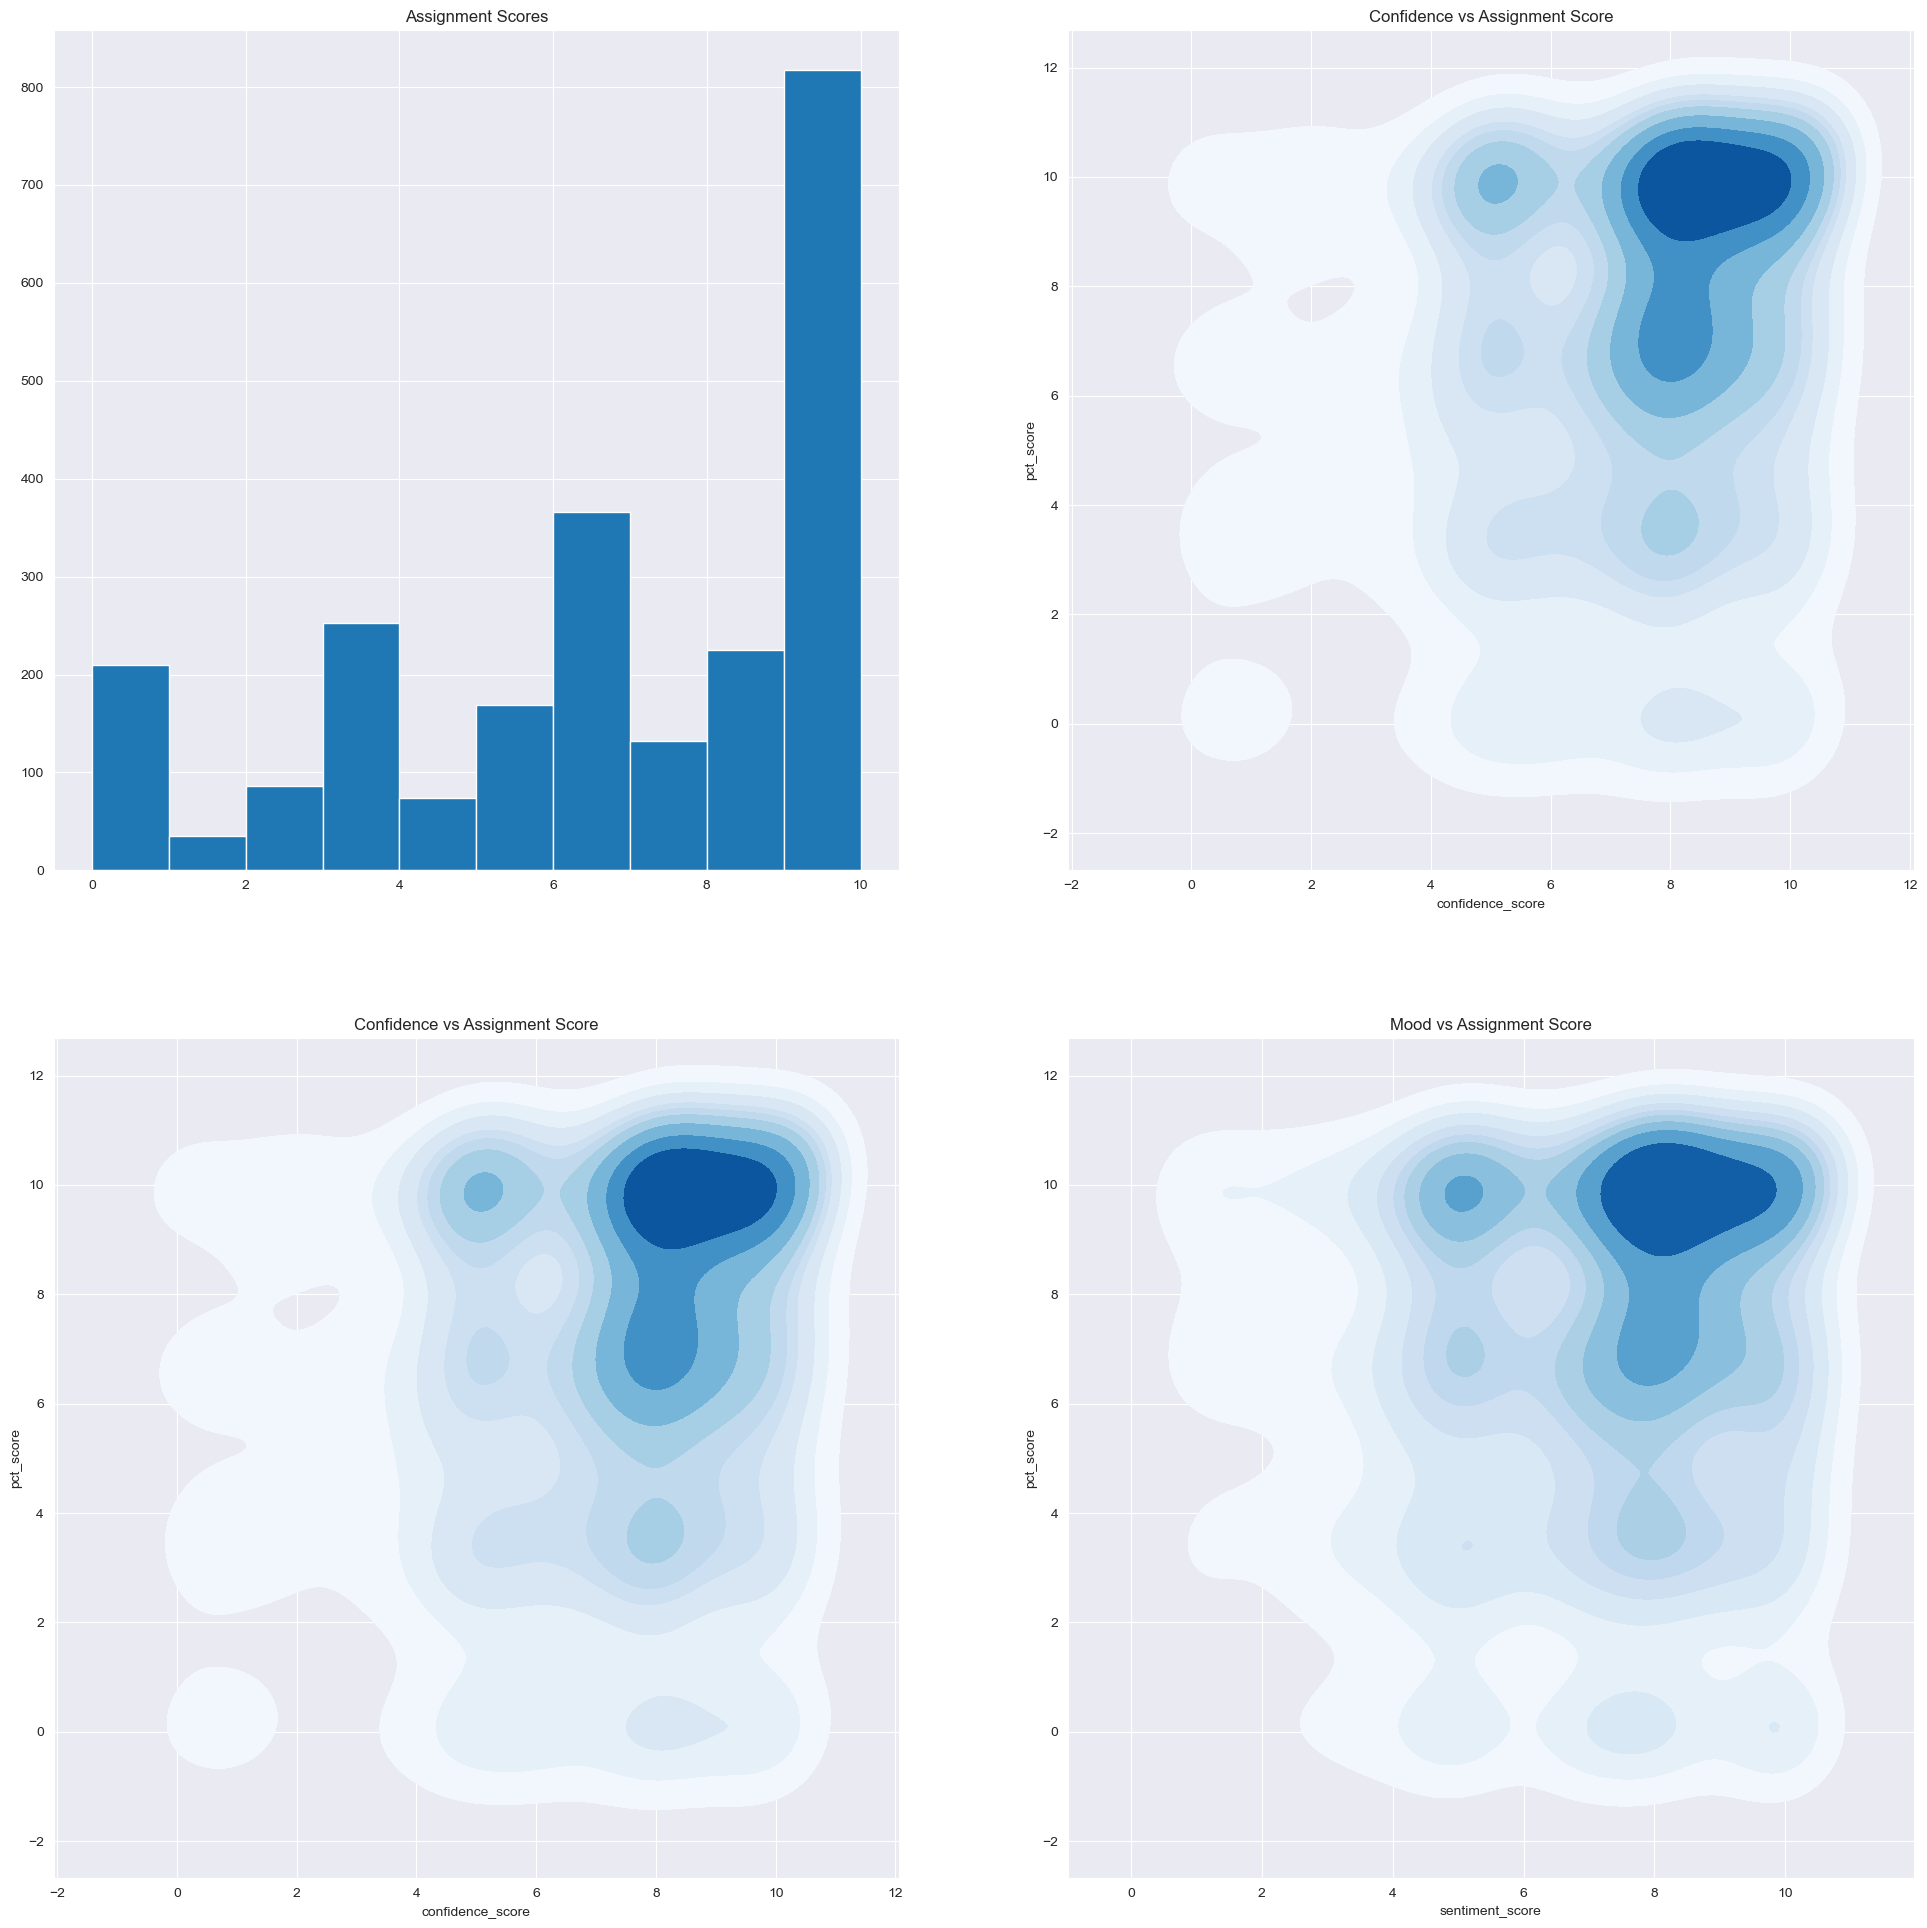

In [41]:
### Lets check out the graphs of self report emotions and their impact on academic performance (fig 3.1)

### scaling up pct score so that it's a metric on a scale of 0-10, similar to the self report emotions
scaled_pct_score = final_df['pct_score']*10

fig, axes = plt.subplots(2, 2, figsize = (24, 24))
sns.set_style("darkgrid")
axes[0,0].hist(scaled_pct_score)
axes[0,0].set_title("Assignment Scores")


cmap = "Blues"
sns.kdeplot(x=final_df["confidence_score"], y=scaled_pct_score, cmap = cmap, fill=True, ax=axes[1,0])
axes[1,0].set_title("Confidence vs Assignment Score")
sns.kdeplot(x=final_df["confidence_score"], y=scaled_pct_score, cmap = cmap, fill=True, ax=axes[0,1])
axes[0,1].set_title("Confidence vs Assignment Score")
sns.kdeplot(x=final_df["sentiment_score"], y=scaled_pct_score, cmap = cmap, fill=True, ax=axes[1,1]);
axes[1,1].set_title("Mood vs Assignment Score")

In [42]:
motivation_pct_score_corr, motivation_pct_score_p_value = pearsonr(final_df['motivation_score'], final_df['pct_score'])

sentiment_pct_score_corr, sentiment_pct_score_p_value = pearsonr(final_df['sentiment_score'], final_df['pct_score'])

confidence_pct_score_corr, confidence_pct_score_p_value = pearsonr(final_df['confidence_score'], final_df['pct_score'])

print("Motivation and academic performance are correlated with a coefficient of: ", motivation_pct_score_corr, "and a p-val of: ", motivation_pct_score_p_value)

print("Mood and academic performance are correlated with a coefficient of: ", sentiment_pct_score_corr, "and a p-val of: ", sentiment_pct_score_p_value)

print("Confidence and academic performance are correlated with a coefficient of: ", confidence_pct_score_corr, "and a p-val of: ", confidence_pct_score_p_value)

Motivation and academic performance are correlated with a coefficient of:  0.1351821997147519 and a p-val of:  4.0096787606616317e-11
Mood and academic performance are correlated with a coefficient of:  0.08638021336062747 and a p-val of:  2.574102331726764e-05
Confidence and academic performance are correlated with a coefficient of:  0.16017839059155758 and a p-val of:  4.522621744232251e-15


### Concluding question 3: The finding here based on Aprendemos data is that confidence is the emotion of these three with the most significant relationship to academic performance, even though the relationship isn't very strong.

## Question 4 & 5: What groups can we start to uncover in student self report data and student academic performance data?

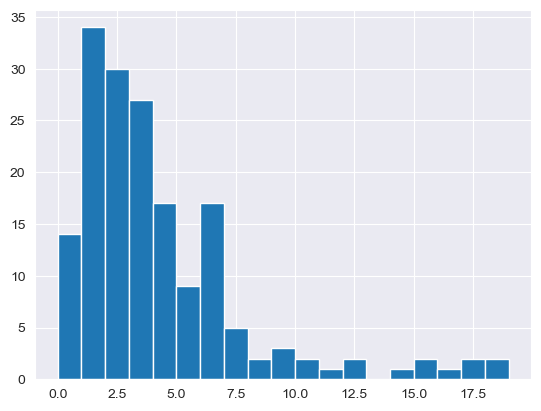

In [43]:
### First, let's see how we can bucket the amount of time students spend on their assessments (fig 4.1)
avg_times = groupedby_student[["avg_quiz_time", "avg_landing_time"]].mean()

### go from ms to minutes
avg_times = avg_times / (1000*60)

plt.hist(avg_times.avg_quiz_time, bins = np.arange(0, 20, 1));

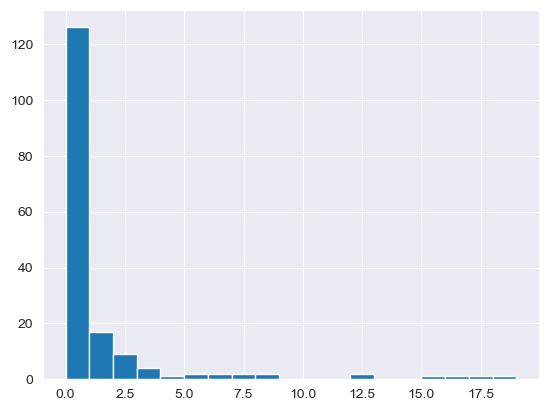

In [44]:
### A lot of students fly through their entrance and exit tickets in < 5 mins

### Now, let's look at how long students generally spend on the landing page (fig 4.2)
plt.hist(avg_times.avg_landing_time, bins = np.arange(0, 20, 1));

(0.0, 20.0)

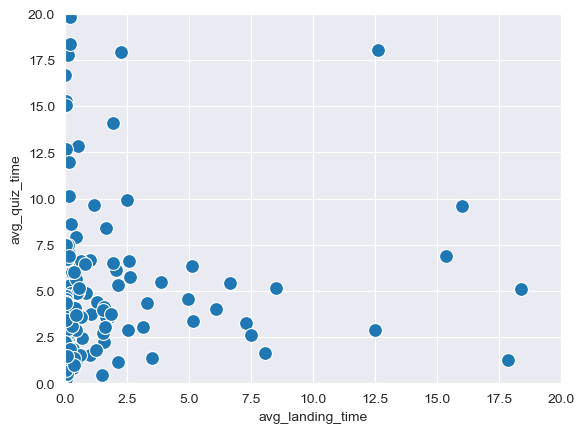

In [45]:
### most students don't spend very long on the landing page, with only a small tail over 1 min

### Let's correlate the amount of time spent on the quiz and the amount of time on the landing page (Fig 4.3)
sns.scatterplot(x=avg_times.avg_landing_time, y=avg_times.avg_quiz_time, s=100)
plt.xlim(0,20)
plt.ylim(0,20)

In [46]:
time_spent_corr, time_spent_p_value = pearsonr(avg_times.avg_landing_time, avg_times.avg_quiz_time)

print("Time spent on the quiz and time spent waiting on the home page are correlated with a coefficient of ",
     time_spent_corr, " and a confidence of ", time_spent_p_value)

Time spent on the quiz and time spent waiting on the home page are correlated with a coefficient of  0.11452317980586192  and a confidence of  0.1335269045817093


In [47]:
### Let's put all the metrics grouped by student into one df
agg_metrics = avg_times.merge(student_variance, left_index=True, right_index=True)
agg_metrics = agg_metrics.merge(groupedby_student["pct_score"].mean(), left_index=True, right_index=True)
agg_metrics

,avg_quiz_time,avg_landing_time,sentiment_variance,confidence_variance,motivation_variance,pct_score
user_id,,,,,,
62ffe9bd17896ba5497b8de6,19.830413,0.189473,0.041046,0.027767,0.014085,0.978761
62ffe9d317896ba5497b8df0,5.346088,0.194768,4.039685,0.314452,0.145455,0.921620
62ffe9d317896ba5497b8df7,6.365339,5.147759,2.339141,2.048780,2.780488,0.567699
62ffe9f117896ba5497b8e20,9.658532,1.194102,0.098958,0.366815,0.402530,0.869829
62ffea3717896ba5497b8e40,4.892881,0.251453,2.199825,5.254737,7.513684,0.864662
...,...,...,...,...,...,...
63d7ed58ac8332d2dd9cd24f,0.460729,1.486260,5.476190,3.285714,8.571429,0.095238
63d7eddcac8332d2dd9cd362,3.402137,0.059665,2.250000,4.250000,12.916667,0.000000
63d7f0aaac8332d2dd9cd65b,0.966537,0.387418,0.666667,0.250000,1.583333,0.166667


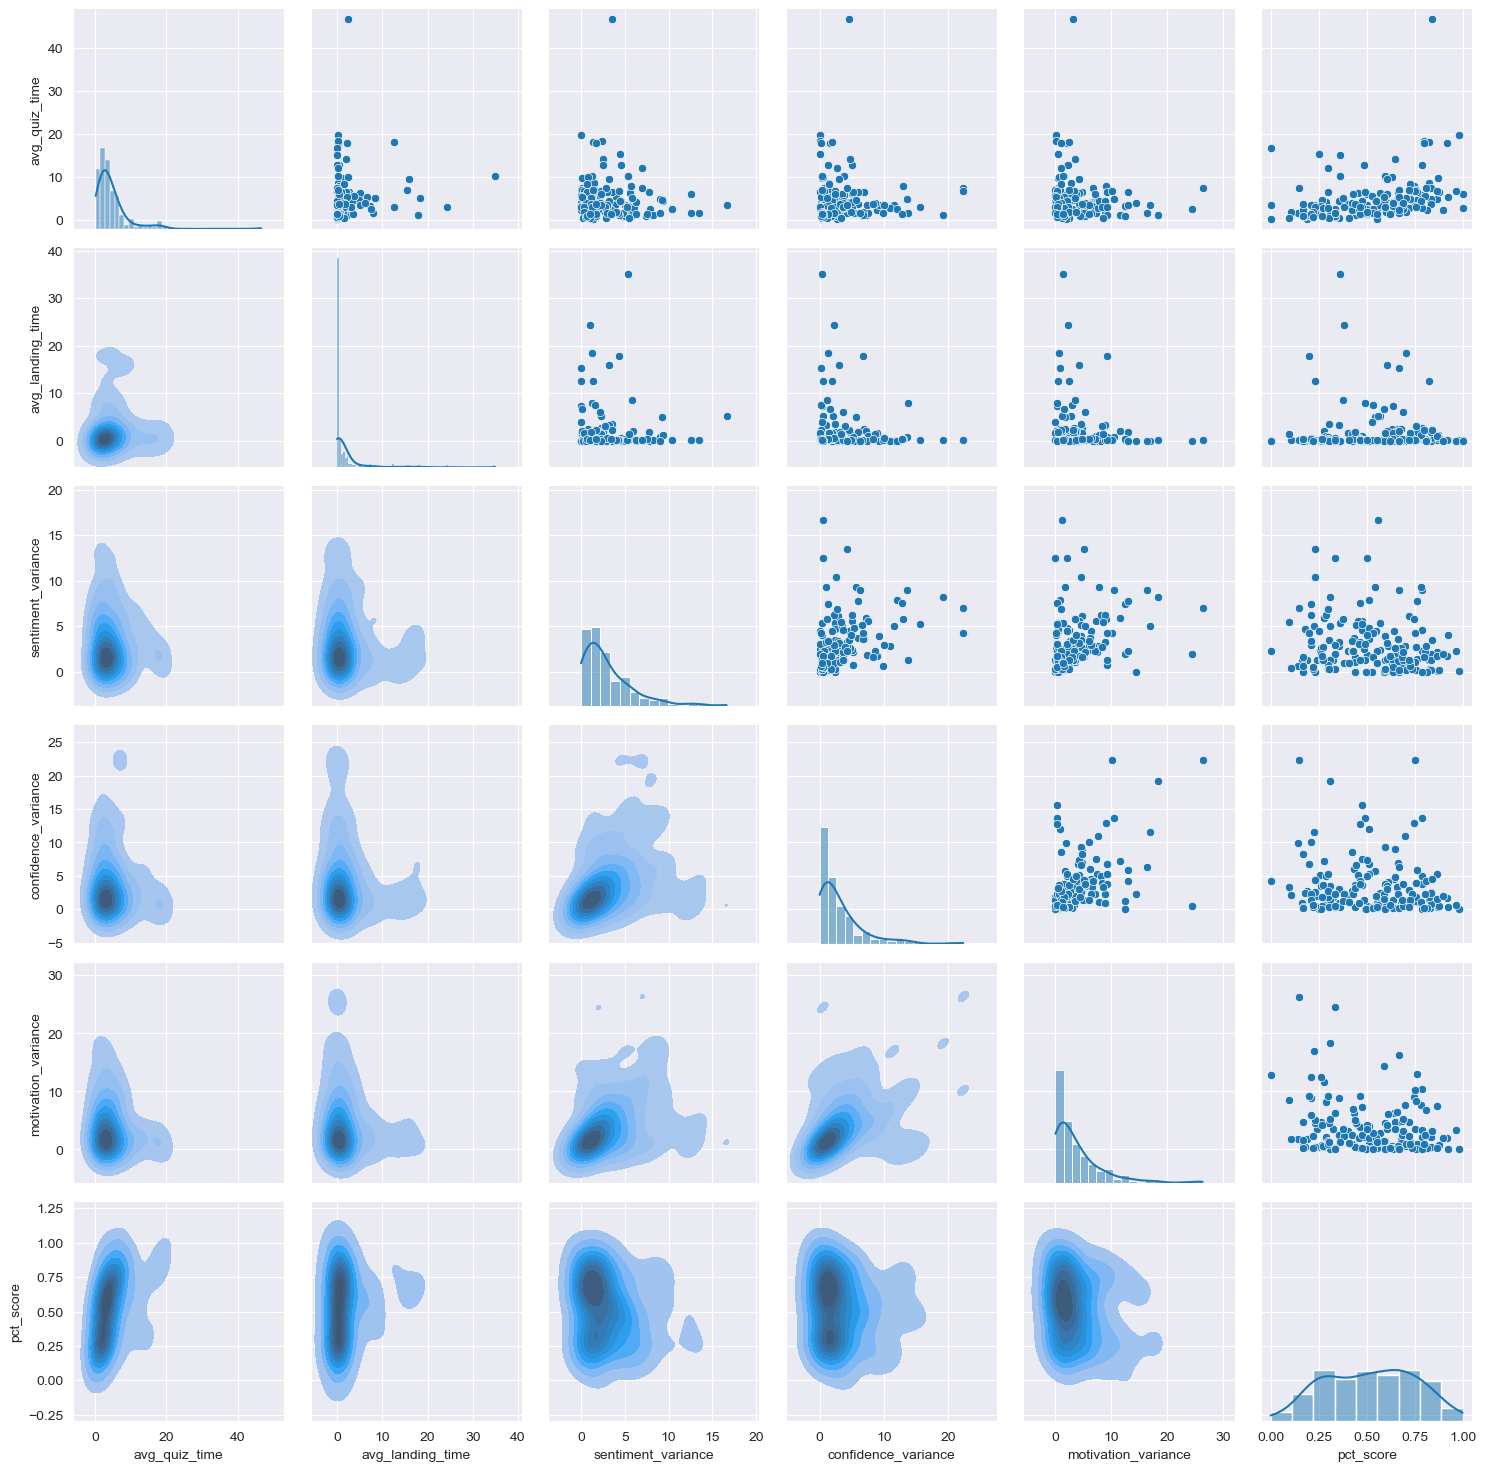

In [48]:
### Let's see how these aggregate metrics might relate to one another (fig. 4.4)
g = sns.PairGrid(agg_metrics[["avg_quiz_time", "avg_landing_time","sentiment_variance","confidence_variance","motivation_variance", "pct_score"]])
g.map_upper(sns.scatterplot)
g.map_lower(sns.kdeplot, fill=True)
g.map_diag(sns.histplot, kde=True)

In [49]:
### Okay so apart from the 3 emotions being related as we discussed earlier, I can also seem to see 2 or 3 groups 
### in the motivation_variance x avg_quiz_time graph. I can also see what looks like a correlation between the avg
### time a student spent on a quiz and the student's average score. Additionally interesting is that the pct_score
### distribution looks relatively normal.

In [50]:
pctscore_timespent_corr, pctscore_timespent_p_value = pearsonr(agg_metrics["avg_quiz_time"], agg_metrics['pct_score'])

print("The average time a student spent on their quiz and the average score for that student are correlated with a coefficient of ", pctscore_timespent_corr,
     " and a confidence of p = ", pctscore_timespent_p_value)

The average time a student spent on their quiz and the average score for that student are correlated with a coefficient of  0.34821016516998027  and a confidence of p =  2.671939089427843e-06


In [51]:
### Nice! A moderate strength relationship between the average amount of time a student spends on a quiz 
### and the student's average score on their quizzes. So we can say, in general, that students who spend 
### more time on their quizzes tend to do better on their quizzes, though that relationship is not incredibly
### strong, nor can we say it's causal

In [52]:
### It seems like time spent on the quiz has something to say about academic outcomes, so let's see if
### time spent on the quiz can uncover trends with any other data points
agg_metrics["quiz_time_quartile"] = pd.qcut(agg_metrics['avg_quiz_time'], 4, labels=False)
agg_metrics

,avg_quiz_time,avg_landing_time,sentiment_variance,confidence_variance,motivation_variance,pct_score,quiz_time_quartile
user_id,,,,,,,
62ffe9bd17896ba5497b8de6,19.830413,0.189473,0.041046,0.027767,0.014085,0.978761,3
62ffe9d317896ba5497b8df0,5.346088,0.194768,4.039685,0.314452,0.145455,0.921620,2
62ffe9d317896ba5497b8df7,6.365339,5.147759,2.339141,2.048780,2.780488,0.567699,3
62ffe9f117896ba5497b8e20,9.658532,1.194102,0.098958,0.366815,0.402530,0.869829,3
62ffea3717896ba5497b8e40,4.892881,0.251453,2.199825,5.254737,7.513684,0.864662,2
...,...,...,...,...,...,...,...
63d7ed58ac8332d2dd9cd24f,0.460729,1.486260,5.476190,3.285714,8.571429,0.095238,0
63d7eddcac8332d2dd9cd362,3.402137,0.059665,2.250000,4.250000,12.916667,0.000000,2
63d7f0aaac8332d2dd9cd65b,0.966537,0.387418,0.666667,0.250000,1.583333,0.166667,0


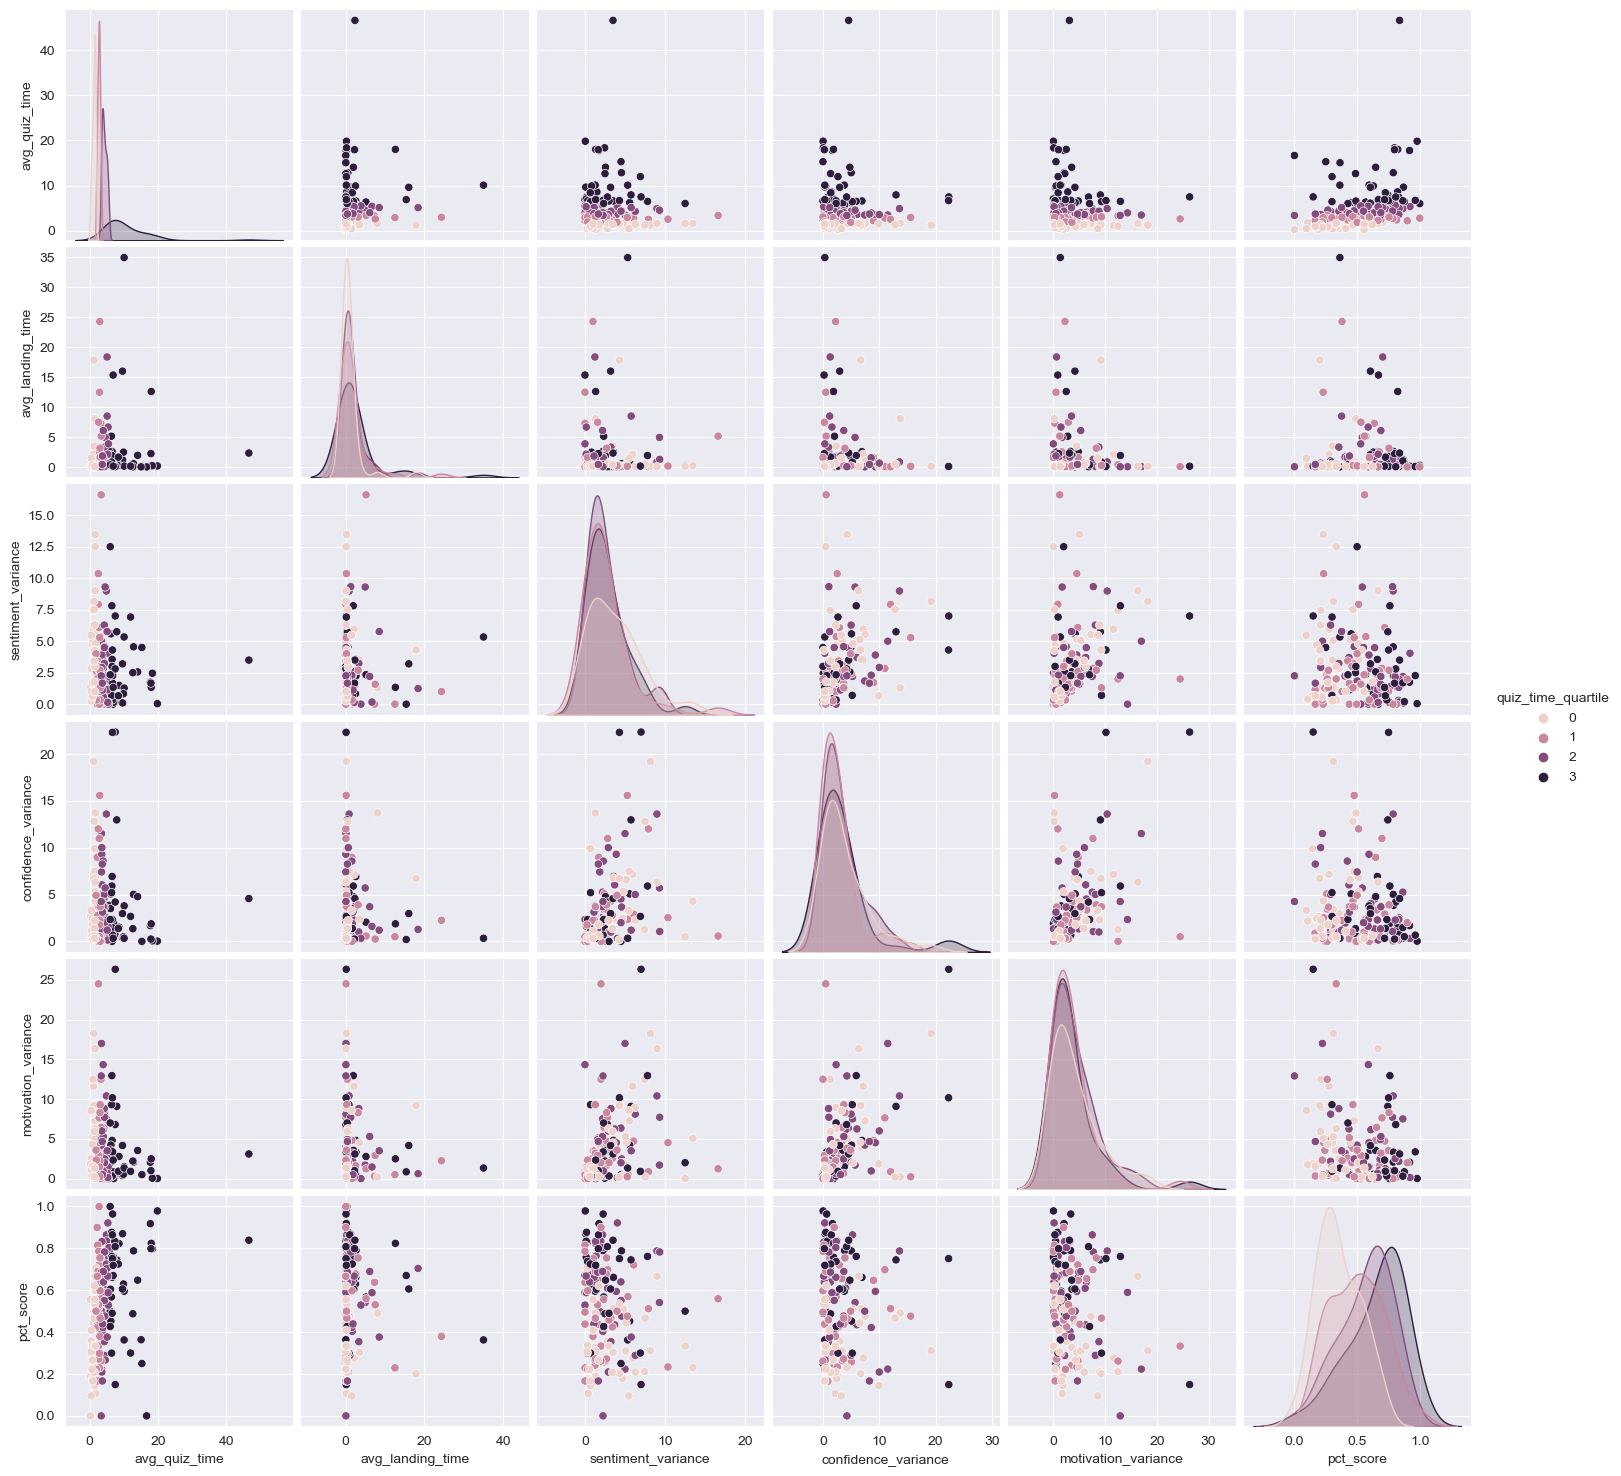

In [53]:
### Let's break the metrics down by the avg time spent taking a quiz (fig. 4.5)
g = sns.pairplot(agg_metrics, hue="quiz_time_quartile")

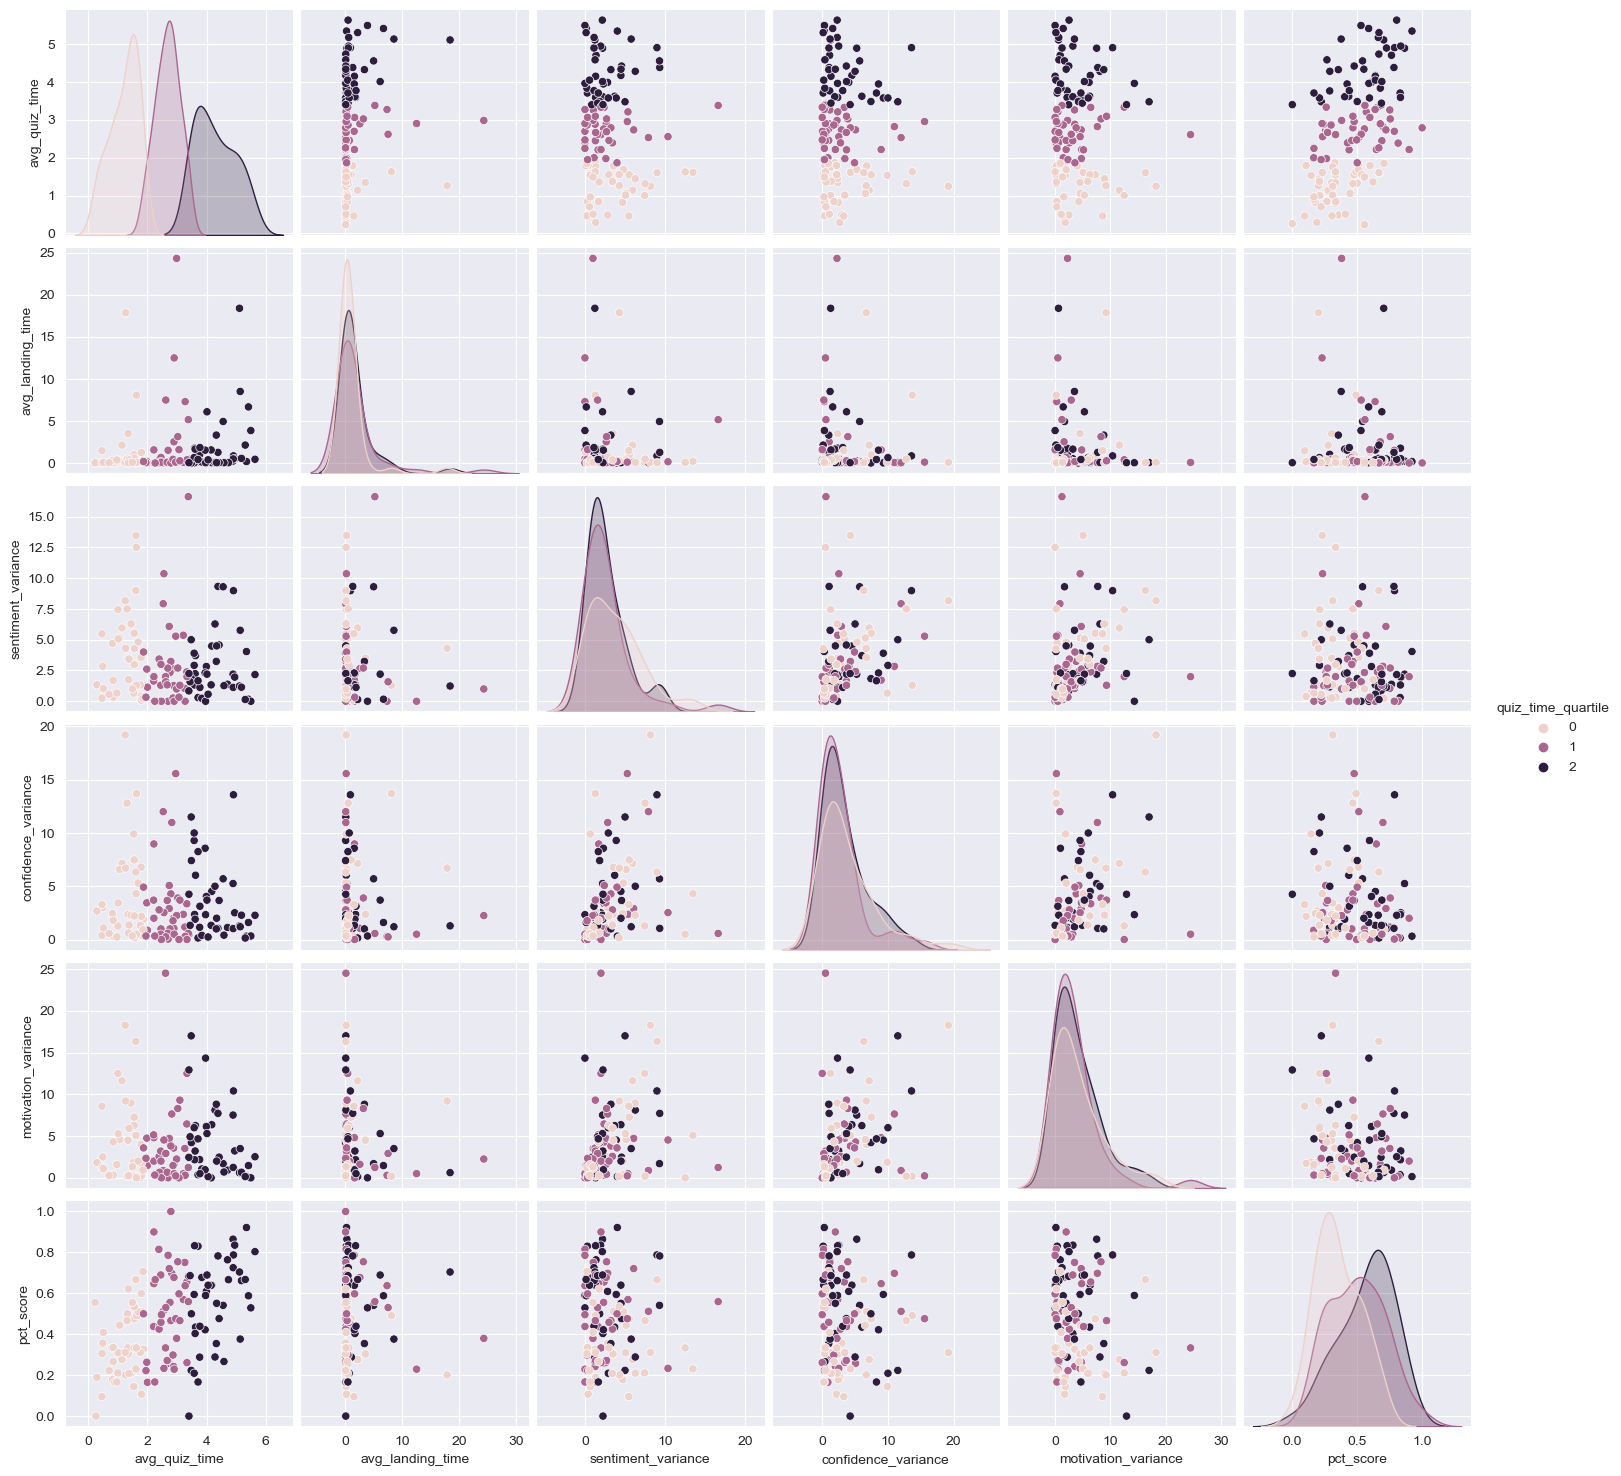

In [54]:
### Let's remove the top bin of quiz time takers (fig. 4.6)
middle_timetakers = agg_metrics[agg_metrics["quiz_time_quartile"] < 3]
sns.pairplot(middle_timetakers, hue="quiz_time_quartile")

In [55]:
pctscore_timespent_corr, pctscore_timespent_p_value = pearsonr(middle_timetakers["avg_quiz_time"], middle_timetakers['pct_score'])

print("The average time a student spent on their quiz and the average score for that student are correlated with a coefficient of ", pctscore_timespent_corr,
     " and a confidence of p = ", pctscore_timespent_p_value, " when we exclude the top quartile of time taken on the quiz")

The average time a student spent on their quiz and the average score for that student are correlated with a coefficient of  0.49349221300357  and a confidence of p =  2.4371369892022978e-09  when we exclude the top quartile of time taken on the quiz


In [56]:
### Interesting! If we cut out the top quartile of people who spend the most time on their quizzes, time spent
### has a stronger correlation to academic performance. Time spent on quizzes could be an interesting metric
### to look at when considering if there are any student clusters that make sense. Let's try and create bands
### for some of the other metrics

In [57]:
agg_metrics["mood_variance_quartile"] = pd.qcut(agg_metrics['sentiment_variance'], 4, labels=False)
agg_metrics["confidence_variance_quartile"] = pd.qcut(agg_metrics['confidence_variance'], 4, labels=False)
agg_metrics["motivation_variance_quartile"] = pd.qcut(agg_metrics['motivation_variance'], 4, labels=False)


In [58]:
agg_metrics["pct_score_quartile"] = pd.qcut(agg_metrics['pct_score'], 4, labels=False)
agg_metrics

,avg_quiz_time,avg_landing_time,sentiment_variance,confidence_variance,motivation_variance,pct_score,quiz_time_quartile,mood_variance_quartile,confidence_variance_quartile,motivation_variance_quartile,pct_score_quartile
user_id,,,,,,,,,,,
62ffe9bd17896ba5497b8de6,19.830413,0.189473,0.041046,0.027767,0.014085,0.978761,3,0.0,0.0,0.0,3
62ffe9d317896ba5497b8df0,5.346088,0.194768,4.039685,0.314452,0.145455,0.921620,2,2.0,0.0,0.0,3
62ffe9d317896ba5497b8df7,6.365339,5.147759,2.339141,2.048780,2.780488,0.567699,3,2.0,2.0,2.0,2
62ffe9f117896ba5497b8e20,9.658532,1.194102,0.098958,0.366815,0.402530,0.869829,3,0.0,0.0,0.0,3
62ffea3717896ba5497b8e40,4.892881,0.251453,2.199825,5.254737,7.513684,0.864662,2,1.0,3.0,3.0,3
...,...,...,...,...,...,...,...,...,...,...,...
63d7ed58ac8332d2dd9cd24f,0.460729,1.486260,5.476190,3.285714,8.571429,0.095238,0,3.0,2.0,3.0,0
63d7eddcac8332d2dd9cd362,3.402137,0.059665,2.250000,4.250000,12.916667,0.000000,2,2.0,2.0,3.0,0
63d7f0aaac8332d2dd9cd65b,0.966537,0.387418,0.666667,0.250000,1.583333,0.166667,0,0.0,0.0,1.0,0


In [59]:
agg_metrics_banded = agg_metrics[["quiz_time_quartile", "mood_variance_quartile", "confidence_variance_quartile", "motivation_variance_quartile", "pct_score_quartile"]]
agg_metrics_banded

,quiz_time_quartile,mood_variance_quartile,confidence_variance_quartile,motivation_variance_quartile,pct_score_quartile
user_id,,,,,
62ffe9bd17896ba5497b8de6,3,0.0,0.0,0.0,3
62ffe9d317896ba5497b8df0,2,2.0,0.0,0.0,3
62ffe9d317896ba5497b8df7,3,2.0,2.0,2.0,2
62ffe9f117896ba5497b8e20,3,0.0,0.0,0.0,3
62ffea3717896ba5497b8e40,2,1.0,3.0,3.0,3
...,...,...,...,...,...
63d7ed58ac8332d2dd9cd24f,0,3.0,2.0,3.0,0
63d7eddcac8332d2dd9cd362,2,2.0,2.0,3.0,0
63d7f0aaac8332d2dd9cd65b,0,0.0,0.0,1.0,0


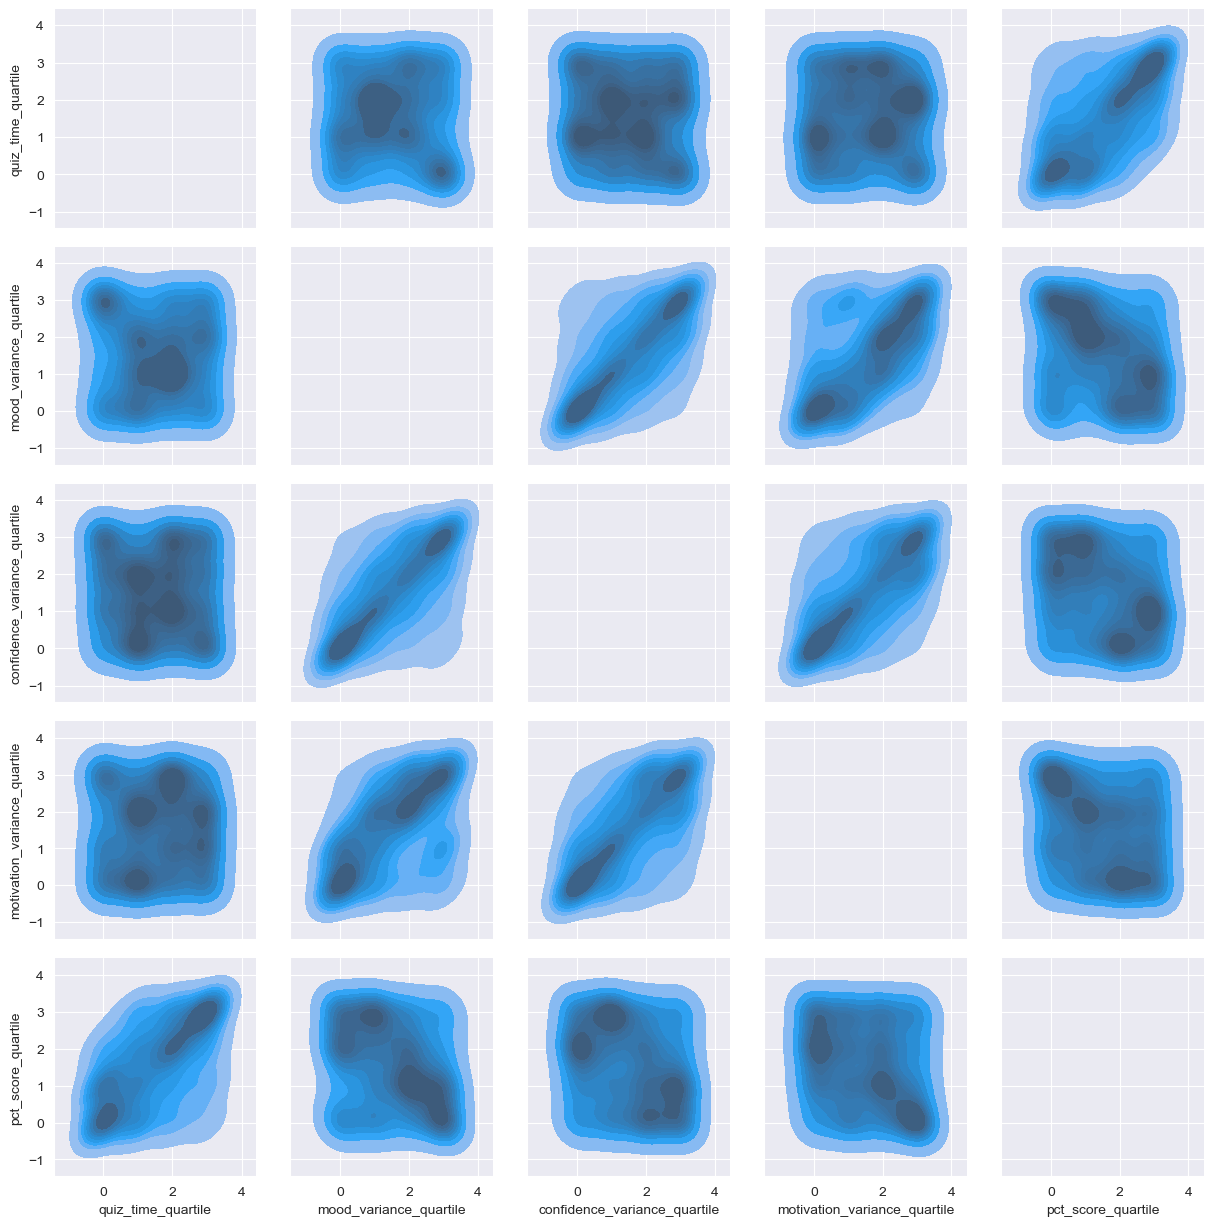

In [60]:
### Let's see how these binned metrics might relate to one another (fig. 4.7)
g = sns.PairGrid(agg_metrics_banded)
g.map_lower(sns.kdeplot, fill=True)
g.map_upper(sns.kdeplot, fill=True)

In [61]:
### Ok so it looks like what we already observed about average time spent on a quiz being related to average quiz 
### score & variance in emotional states being correlated to one another (EG. If you're likely to put varied answers 
### for one emotion, you're more likely to vary your answers for them all) is observeable here. Mostly everything else
### looks like there isn't a strong relationship, but I can see some direction in mood_variance and pct_score. Let's
### check that out

In [62]:
clear_nas = agg_metrics_banded.dropna(subset=["pct_score_quartile", 'mood_variance_quartile'])

pctscore_mood_variance_corr, pctscore_mood_variance_p_value = pearsonr(clear_nas["pct_score_quartile"], clear_nas['mood_variance_quartile'])
print("Academic performance is correlated to variance in self reported mood with a coefficient of ", pctscore_mood_variance_corr, "and a confidence of ", pctscore_mood_variance_p_value)

Academic performance is correlated to variance in self reported mood with a coefficient of  -0.18317729545068473 and a confidence of  0.020421313888608694


In [63]:
### Interesting! A slight negative correlation between the band of variance in self report mood that the student falls
### into and the band of academic performance they fall into. Seems like it's worth prioritizing self report mood in 
### further investigation

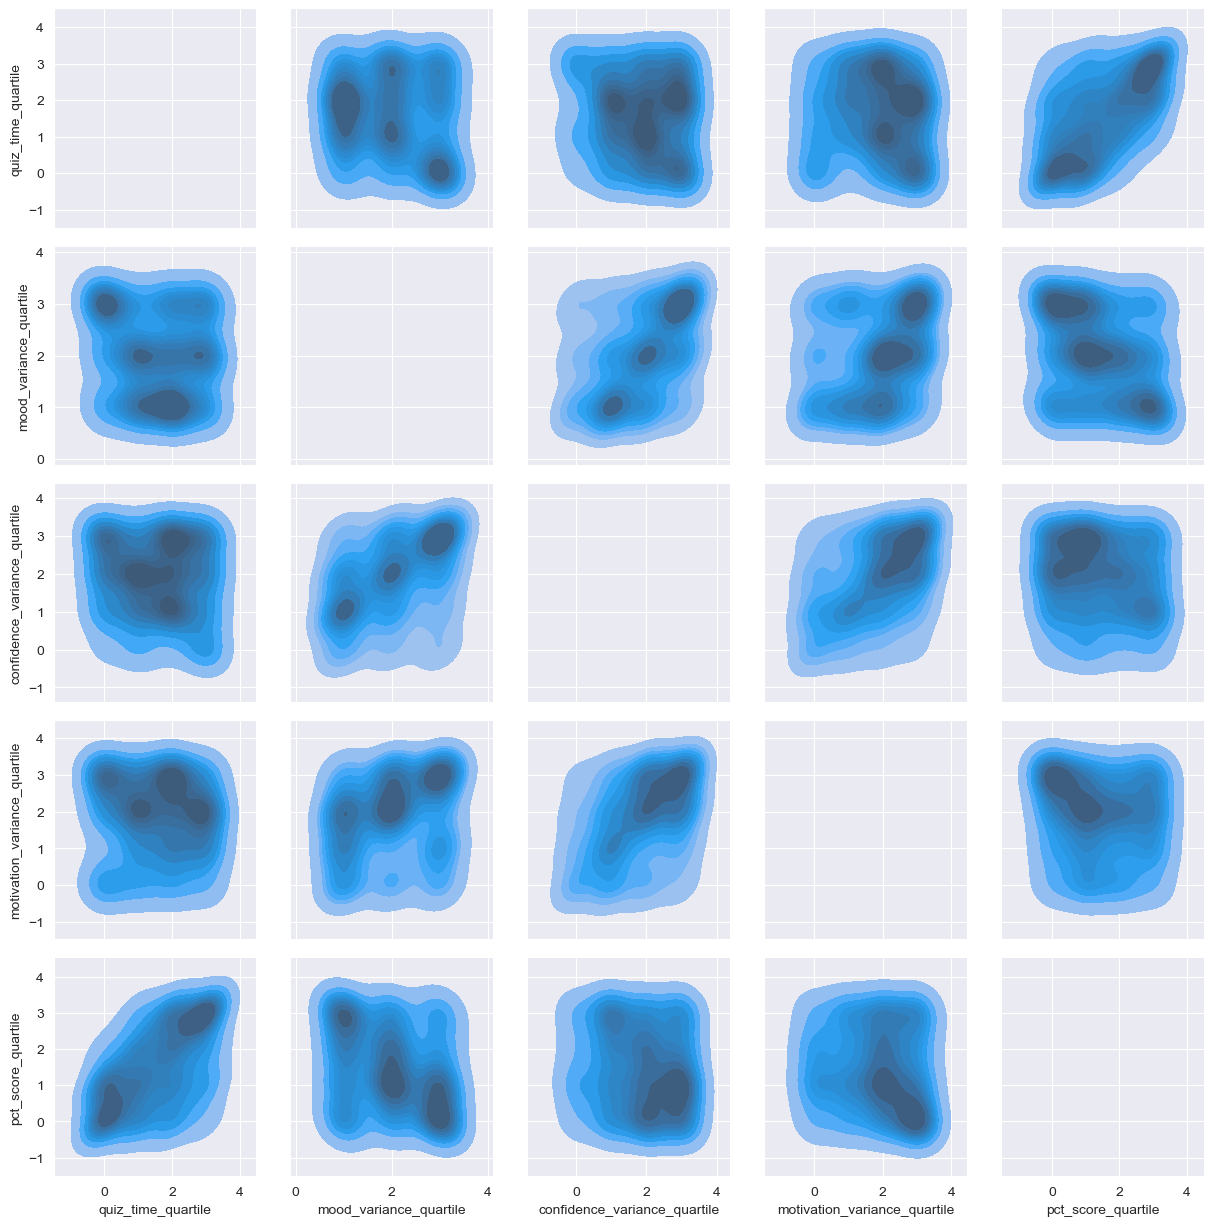

In [64]:
### Let's see how the bins relate to one another without the bottom bin of mood variance
bottom_quartile_mood_variance_removed = agg_metrics_banded[agg_metrics_banded["mood_variance_quartile"] > 0]
g = sns.PairGrid(bottom_quartile_mood_variance_removed)
g.map_lower(sns.kdeplot, fill=True)
g.map_upper(sns.kdeplot, fill=True)

In [65]:
clear_nas = bottom_quartile_mood_variance_removed.dropna(subset=["pct_score_quartile", 'mood_variance_quartile'])

pctscore_mood_variance_corr, pctscore_mood_variance_p_value = pearsonr(clear_nas["pct_score_quartile"], clear_nas['mood_variance_quartile'])
print("Academic performance is correlated to variance in self reported mood with a coefficient of ", pctscore_mood_variance_corr, "and a confidence of ", pctscore_mood_variance_p_value)

Academic performance is correlated to variance in self reported mood with a coefficient of  -0.21024667781906456 and a confidence of  0.02117467176135731


In [66]:
### Looks like the relationship is slightly stronger between academic performance and variation in self report
### mood when we get rid of the bottom variance bucket. This is definitely something to keep an eye on in the future
### when it comes to analyzing student self-report data.

### Concluding questions 4 and 5: There do seem to be some features worth investigating as potential cluster features. Specifically, the average amount of time spent taking the daily quiz and variance in self report mood scores seem to be able to predict academic outcomes to some degree based on the data collected through Aprendemos.

# Conclusion:

### Key findings

There are a few key takeaways from the exploration of the Aprendemos data:

1. Based on Aprendemos' entrance and exit ticket data, it looks like the best performing day of the week is Wednesday, and the worst is Tuesday.

2. Motivation and confidence have the most statistically significant relationship of all the emotions measured with an r of 0.642 and a p-val < 0.05. The relationship between motivation and confidence was ~5-10% stronger than that of the other emotions. 

3. Based on Aprendemos data, confidence seems to be the emotion with the most significant relationship to academic performance. With that said, the relationship isn't a high strength one. (Confidence and academic performance are correlated with a coefficient of:  0.16 and a p-val of:  4.52e-15)

4. Based on Aprendemos data, the average amount of time a student spends on an entrance and exit ticket is moderately positively correlated to average performance on entrance and exit tickets. This relationship exists without any constraints on time, but is strongest for students who spend up to, but not more than, 10 minutes on their entrance and exit tickets. (The average time a student spent on their quiz and the average score for that student are correlated with a coefficient of  0.49  and a confidence of p =  2.44e-09  when we exclude the top quartile of time taken on the quiz)

5. A student's average academic performance and their variance in self reported mood have a weak-to-moderate negative correlation. This relationship is strengthened when excluding the top 25% of mood variance cases from the observation. (Academic performance is correlated to variance in self reported mood with a coefficient of  -0.21 and a confidence of  0.02)

6. All self-report metrics have a moderate-to-strong correlation with one another, and all self-report metrics are strongly skew left. Self report mood has a slightly less skewed distribution.

### Interpretations

1. The fact that the observed relationship between motivation and confidence was stronger than the other inter-emotion relationships could speak to a change in motivation brought on by increased confidence, or vice versa. Students with high confidence are more likely to want to complete the day's work, and students who are intrinsically motivated might also have higher confidence in class as a result of their mindset on learning.

2. It seems likely that students who spent more time on their assignments on average were also completing those assignments more carefully. This also makes sense when given the cutoff mark of 10 minutes for an assignment. Students who spent longer than 10 minutes on an assignment on average could potentially have been putting off doing their work or could also have been exhibiting a lack of confidence in their subject knowledge.

3. Variance in mood's negative correlation to academic performance is particularly interesting. The relationship between emotional well-being and academic success is discussed often, but largely anecdotal (at least in the discussions I've been a part of). Finding a significant relationship here is a really encouraging signal towards further exploration of the relationships between emotions and academic outcomes. This also offers some measure of internal validity to the self report metrics generally, since their variance can (at least in the case of self-reported mood) be shown to correlate somewhat to some behavioral metrics.

4. The fact that there were moderate correlations between the variance of all of the self-report metrics suggests that there might be relevant student groups that could be discovered by analyzing patterns of self-report metrics. The fact that high variance in self-report mood correlated to decreased academic performance is especially interesting in this context, because it means that the student groups we might uncover through investigation of simple patterns in their self-report data could have some predictive power in areas that are extremely important to academic success. 


### Limitations

As discussed previously, there were some limitations in the alignment of Aprendemos' collected data and it's original aim of uncovering relationships between emotional state and behavioral presentation. Additionally, the data set was only representative of a small slice of classrooms in one city in the US, and didn't represent a large sample size of students (Though many of the existing users were well represented by consistent, near-daily use for stretches of time). Finally, this emotional data is limited in the sense that it was collected by a daily self-report survey that didn't change aesthetically, and the group being surveyed ranged in age from 13-16. As such, it's likely that there was a bias towards under-reporting emotions both as a result of the demographic being surveyed, and as a result of the interface of the survey itself.

### Implications

Aprendemos data has shed a preliminary light on the complex relationship between student emotions and their academic success. One striking takeaway was the far-reaching implications of student confidence, extending beyond its own realm to influence performance and emotions in several other areas. Focusing on student confidence and building them up to the idea that they can be successful is a powerful tool. It's an approach that worked well in my classroom, and I would love to offer this "confidence first" teaching mentality as an adage solidly backed by data as a result of this exploration. In reality, though, I think this data set serves mostly to begin a further and more detailed exploration into how a student's emotional well-being might impact all areas of their academic and personal success. 

I do think, however, that these introductory clues towards potential student emotional and behavioral clusters are interesting and worth exploring further. Reaching knowledge that affords some predictive power will allow us to create tools that improve proactivity in student support & truly understand the impact of student emotions on their behavior. Such tools and understandings would be invaluable in supporting student success, and I'm happy to have begun the journey here with Aprendemos.


### Future Work

Like I mentioned in the introduction, I am interested in doing a cluster analysis on this data set to see if there are any interesting groups that can be identified when it comes to student behavior, self-reporting patterns, and academic outcomes. All of this work also serves as an initial foundation for future work with Abloom, through which there will hopefully be a set of data that's much larger, more feature rich, and representative of a wider range of students. The understanding built here in this initial exploration will hopefully lower the time to activation for uncovering insights in those future data on student well-being and behavior.


### Thank You!

Thanks for taking the time to read through all of this! Like I mentioned, I'm currently (as of 8/23) working towards furthering an understanding of student emotions with my work at Abloom (www.abloomai.com). If you're interested, definitely check us out! There will hopefully be much more interesting data and much more depth of understanding to come in the near future.